In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stocks/MFC_Manulife Financial.csv
/kaggle/input/stocks/TMQ_Trilogy Metals Inc.csv
/kaggle/input/stocks/APHA_Aphria Inc..csv
/kaggle/input/stocks/BYD_Boyd Group Services.csv
/kaggle/input/stocks/DOL_Dollarama.csv
/kaggle/input/stocks/BLDP_Ballard Power Systems Inc..csv
/kaggle/input/stocks/OTEX_Opentext.csv
/kaggle/input/stocks/CSGP_CoStar Group Inc.csv
/kaggle/input/stocks/TH_Theratechnologies Inc..csv
/kaggle/input/stocks/NEPT_Neptune Wellness Solutions Inc..csv
/kaggle/input/stocks/TD_Toronto-Dominion Bank.csv
/kaggle/input/stocks/GOOS_Canada Goose.csv
/kaggle/input/stocks/PLC_Park Lawn Corp.csv
/kaggle/input/stocks/AC_Air canada.csv
/kaggle/input/stocks/SHOP_Shopify.csv
/kaggle/input/stocks/GSY_Goeasy Ltd.csv
/kaggle/input/stocks/KL_Kirkland Lake.csv
/kaggle/input/stocks/ENB_Enbridge.csv
/kaggle/input/stocks/CSGS_CSG Systems International Inc.csv
/kaggle/input/stocks/ETFC_ETRADE Financial Corporation.csv
/kaggle/input/stocks/NOA_North American Construction Group Ltd..c

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow
np.random.seed(1551)
tensorflow.random.set_seed(1551)
# Importing the Keras libraries and packages
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.layers.core import Activation
from keras import optimizers
# from tensorflow.keras.losses import huber_loss
from keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

In [6]:
## Add Stock Name (sample)
df1 = pd.read_csv("/kaggle/input/stocks/AC_Air canada.csv")
df1['Stock name'] = 'AC_Air canada'

### Ballard Power System
df2 = pd.read_csv("/kaggle/input/stocks/BLDP_Ballard Power Systems Inc..csv")
df2['Stock name'] = 'BLDP_Ballard Power Systems Inc.'

## Boyd Services'
df3 = pd.read_csv("/kaggle/input/stocks/BYD_Boyd Group Services.csv")
df3['Stock name'] = 'BYD_Boyd Group Services'

## Trilogy Metals
df4 = pd.read_csv("/kaggle/input/stocks/TMQ_Trilogy Metals Inc.csv")
df4['Stock name'] = 'TMQ_Trilogy Metals Inc'

## CoStar Group
df5 = pd.read_csv("/kaggle/input/stocks/CSGP_CoStar Group Inc.csv")
df5['Stock name'] = 'CSGP_CoStar Group Inc'

## CSGS_CSG Systems International
df6 = pd.read_csv("/kaggle/input/stocks/CSGS_CSG Systems International Inc.csv")
df6['Stock name'] = 'CSGS_CSG Systems International Inc'

## CSU Constellation Software
df7 = pd.read_csv("/kaggle/input/stocks/CSU_Constellation Software.csv")
df7['Stock name'] = 'CSU_Constellation Software'

## Dollarama
df8 = pd.read_csv("/kaggle/input/stocks/DOL_Dollarama.csv")
df8['Stock name'] = 'DOL_Dollarama'

## ENB_Enbridge
df9 = pd.read_csv("/kaggle/input/stocks/ENB_Enbridge.csv")
df9['Stock name'] = 'ENB_Enbridge'

## ETFC 
df10 = pd.read_csv("/kaggle/input/stocks/ETFC_ETRADE Financial Corporation.csv")
df10['Stock name'] = 'ETFC_ETRADE Financial Corporation'

## GIB_CGI
df11 = pd.read_csv("/kaggle/input/stocks/GIB_CGI Inc.csv")
df11['Stock name'] = 'GIB_CGI Inc'

## GSY_Goeasy
df12 = pd.read_csv("/kaggle/input/stocks/GSY_Goeasy Ltd.csv")
df12['Stock name'] = 'GSY_Goeasy Ltd'

## Kirkland
df13 = pd.read_csv("/kaggle/input/stocks/KL_Kirkland Lake.csv")
df13['Stock name'] = 'KL_Kirkland Lake'

## Manulife financial
df14 = pd.read_csv("/kaggle/input/stocks/MFC_Manulife Financial.csv")
df14['Stock name'] = 'MFC_Manulife Financial'

## Neptune Wellness Solution
df15 = pd.read_csv("/kaggle/input/stocks/NEPT_Neptune Wellness Solutions Inc..csv")
df15['Stock name'] = 'NEPT_Neptune Wellness Solutions Inc.'

## North American Construction
df16 = pd.read_csv("/kaggle/input/stocks/NOA_North American Construction Group Ltd..csv")
df16['Stock name'] = 'NOA_North American Construction Group Ltd.'

## Open Text
df17 = df = pd.read_csv("/kaggle/input/stocks/OTEX_Opentext.csv")
df17['Stock name'] = 'OTEX_Opentext'

## Shopify
df18 = pd.read_csv("/kaggle/input/stocks/SHOP_Shopify.csv")
df18['Stock name'] = 'SHOP_Shopify'

## TD Bank
df19 = pd.read_csv("/kaggle/input/stocks/TD_Toronto-Dominion Bank.csv")
df19['Stock name'] = 'TD_Toronto-Dominion Bank'

## TH_Theratechnologies
df20 = pd.read_csv("/kaggle/input/stocks/TH_Theratechnologies Inc..csv")
df20['Stock name'] = 'TH_Theratechnologies Inc.'

In [7]:
def preprocessing(df):
    df['open'] = pd.to_numeric(df['open'])
    df['high'] = pd.to_numeric(df['high'])
    df['low'] = pd.to_numeric(df['low'])
    df['close'] = pd.to_numeric(df['close'])
    
    df = df.drop(['Stock name'], axis = 1)
    
    df = df.set_index('date')[ '2020-04-30':'2016-01-01']
    df = df.reset_index()
    
    df = df.sort_values('date')
    np.random.seed(1551)
    tensorflow.random.set_seed(1551)
    
    len_df = int(len(df)*0.7)
    train_df = df[0: len_df]
    test_df = df[len_df:]
    
    train_df = train_df.drop(['adjclose', 'volume'], axis = 1)
    test_df = test_df.drop(['adjclose', 'volume'], axis =1)
    
    ## Training 
    y_train = train_df['open'] ## Targets
    date_train = train_df.iloc[:,0] ## Date
    x_train = train_df.iloc[:, 2:5] ## Data
    
    ## Testing
    y_valid = test_df['open'] 
    date_valid = test_df.iloc[:,0]
    x_valid = test_df.iloc[:, 2:5]
    
    return x_train, y_train, x_valid, y_valid, date_train, date_valid   

In [8]:
def graph1(date_train, y_train, date_valid, y_valid):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(figsize = (8,3))
    ax.plot(date_train, y_train, color = 'red', marker='', linewidth='0.75')
    ax.plot(date_valid, y_valid, color = 'blue', marker='', linewidth='0.75')
    plt.setp(ax.get_xticklabels(), rotation=45)
    plt.legend(['Training Data', 'Testing Data'], loc='upper left')
    ax.set(xlabel="Date",
           ylabel="Open Price",
           title="Stock Prices");
    plt.show()

In [9]:
df1

date  volume       open       high        low      close  \
0     2020-07-02    8700  36.349998  36.349998  35.910000  36.119999   
1     2020-07-01   12000  37.369999  37.549999  35.459999  35.459999   
2     2020-06-30   18900  35.095001  36.889999  35.070000  36.689999   
3     2020-06-29   29700  33.049999  36.505001  33.049999  36.009998   
4     2020-06-26   29300  34.590000  34.590000  32.511002  32.799999   
...          ...     ...        ...        ...        ...        ...   
1154  2015-12-01   24600  29.500000  34.060001  29.500000  33.200001   
1155  2015-11-25     300  29.309999  30.230000  29.309999  30.230000   
1156  2015-11-19    1000  28.000000  28.000000  28.000000  28.000000   
1157  2015-11-16     300  26.799999  26.799999  26.799999  26.799999   
1158  2015-11-10    1100  26.200001  27.709999  26.200001  27.709999   

       adjclose     Stock name  
0     36.119999  AC_Air canada  
1     35.459999  AC_Air canada  
2     36.689999  AC_Air canada  
3     36.009998  AC_Air canada  
4     32.799999  AC_Air canada  
...         ...            ...  
1154  32.355209  AC_Air canada  
1155  29.460785  AC_Air canada  
1156  27.287527  AC_Air canada  
1157  26.118061  AC_Air canada  
1158  27.004908  AC_Air canada  

[1159 rows x 8 columns]

# ANN's (MLP vs Single layer Perceptron)

STOCK NAME:  AC_Air canada
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2232
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0114
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0093
Epoch 10/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 1/10
39/39 [==============================] - 0s 991us/step - loss: 0.3186
Epoch 2/10
39/39 [==============================] - 0s 937us/step - loss: 0.0111
Epoch 3/10
39/39 [==

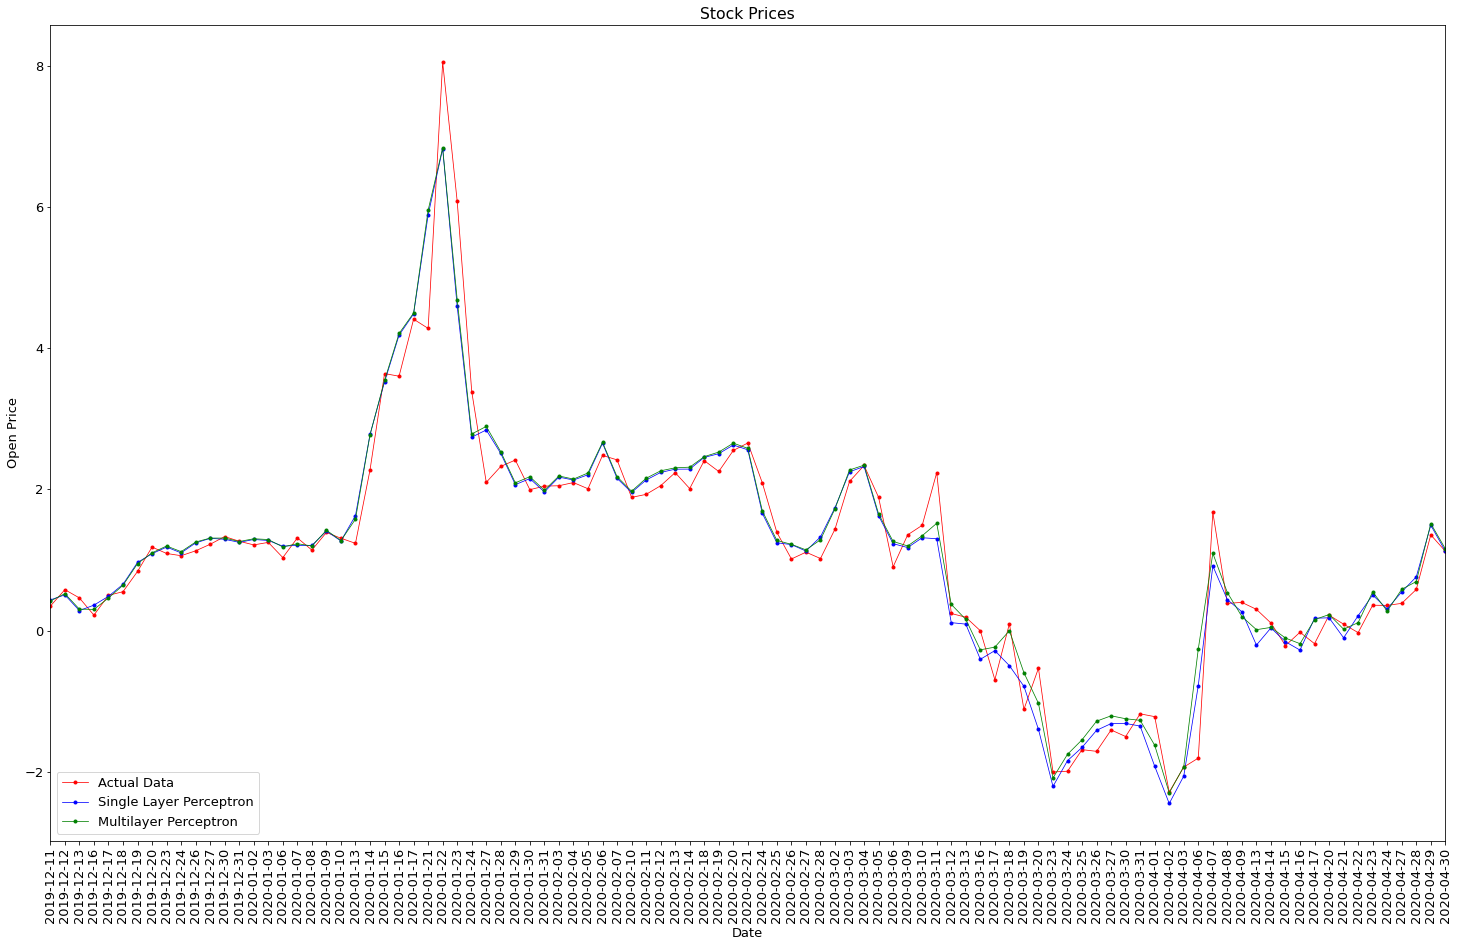

STOCK NAME:  BLDP_Ballard Power Systems Inc.
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2258
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 8/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 1/10
39/39 [==============================] - 0s 981us/step - loss: 0.3238
Epoch 2/10
39/39 [==============================] - 0s 996us/step - loss: 0.0039
Ep

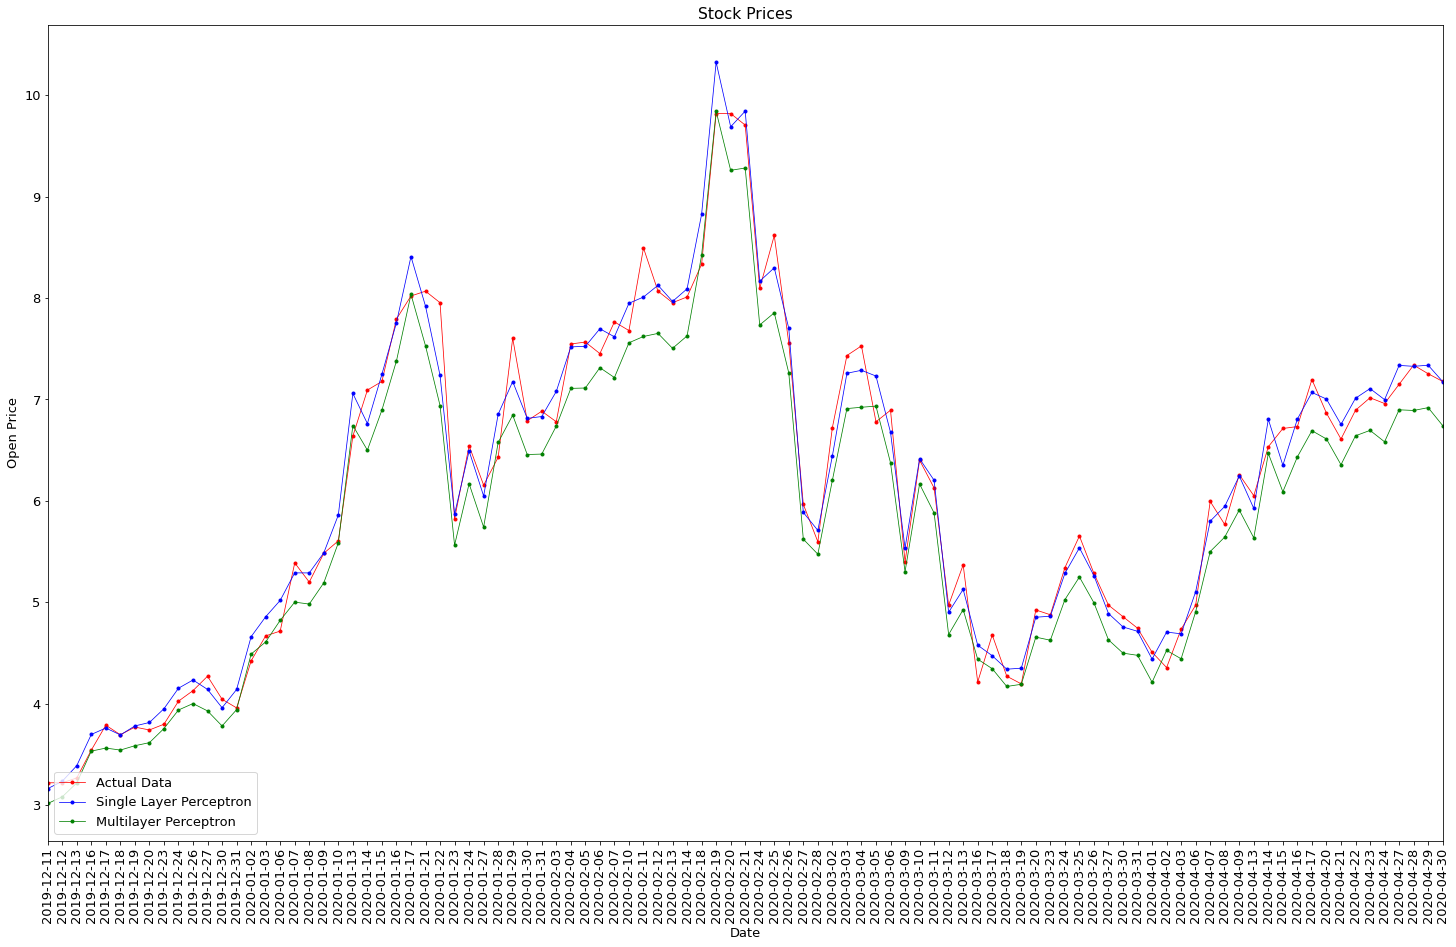

STOCK NAME:  BYD_Boyd Group Services
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2214
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 10/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3197
Epoch 2/10
39/39 [==============================] - 0s 976us/step - loss: 0.0036
Epoch 3/10
3

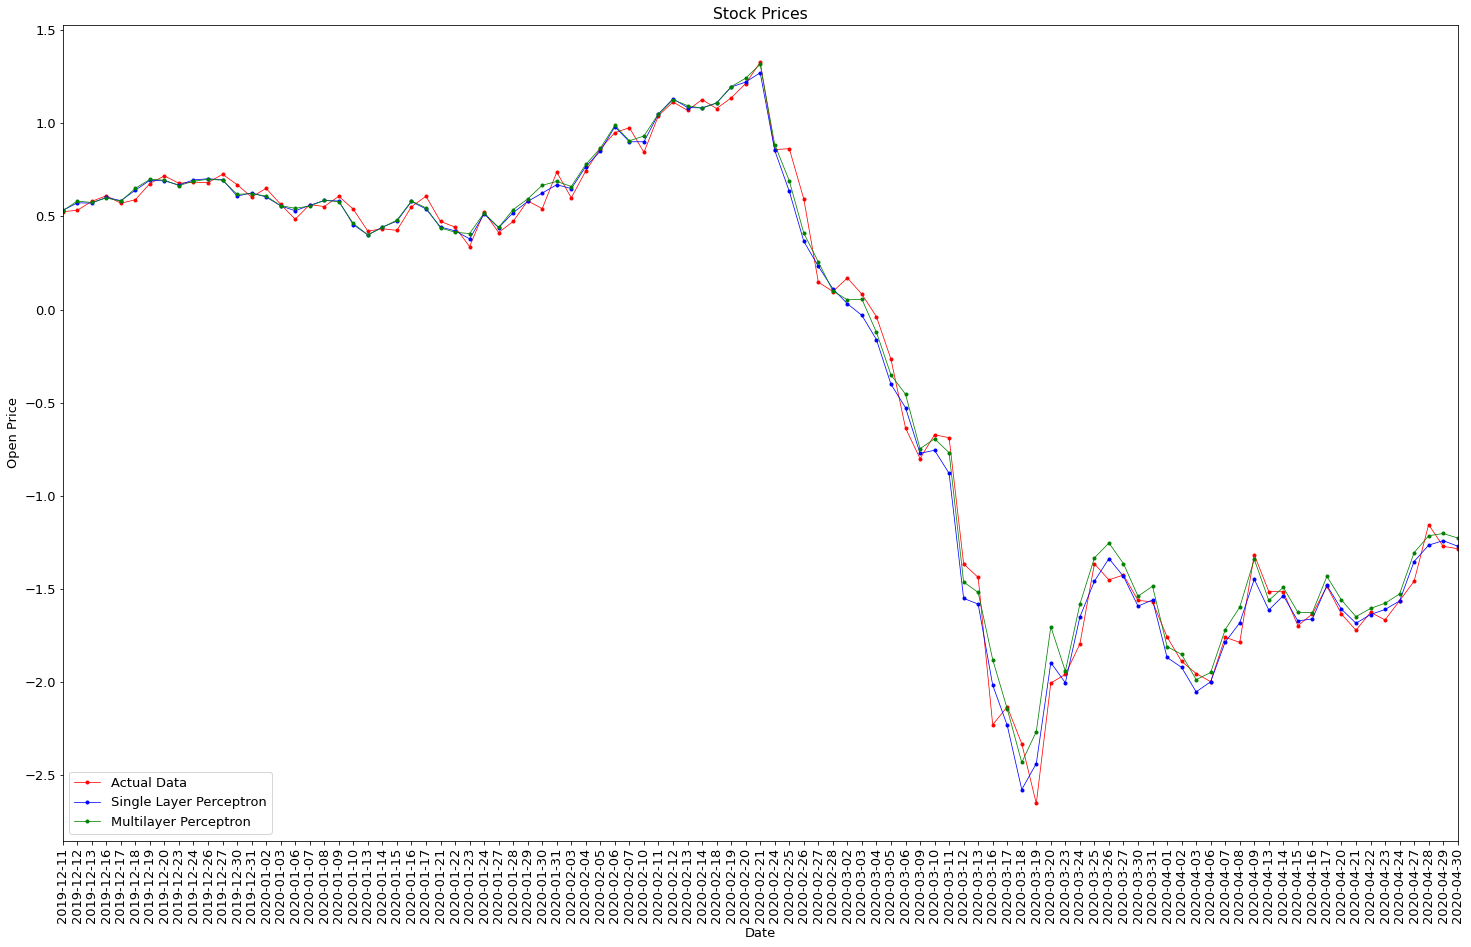

STOCK NAME:  TMQ_Trilogy Metals Inc
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2044
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3019
Epoch 2/10
39/39 [==============================] - 0s 932us/step - loss: 0.0036
Epoch 3/10
39

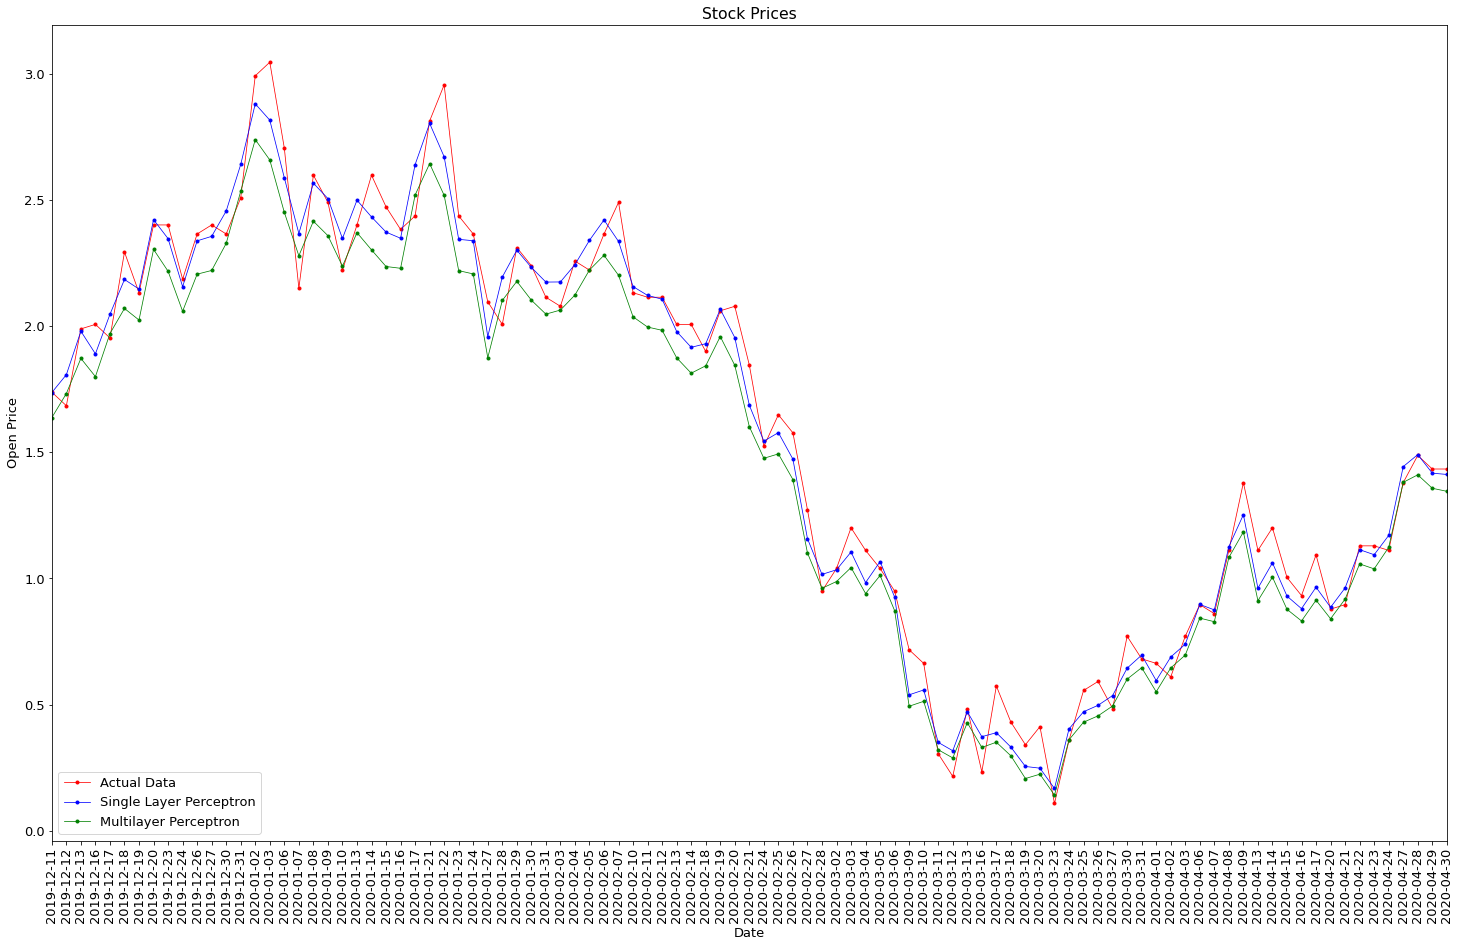

STOCK NAME:  CSGP_CoStar Group Inc
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2268
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3265
Epoch 2/10
39/39 [==============================] - 0s 990us/step - loss: 0.0025
Epoch 3/10
39/

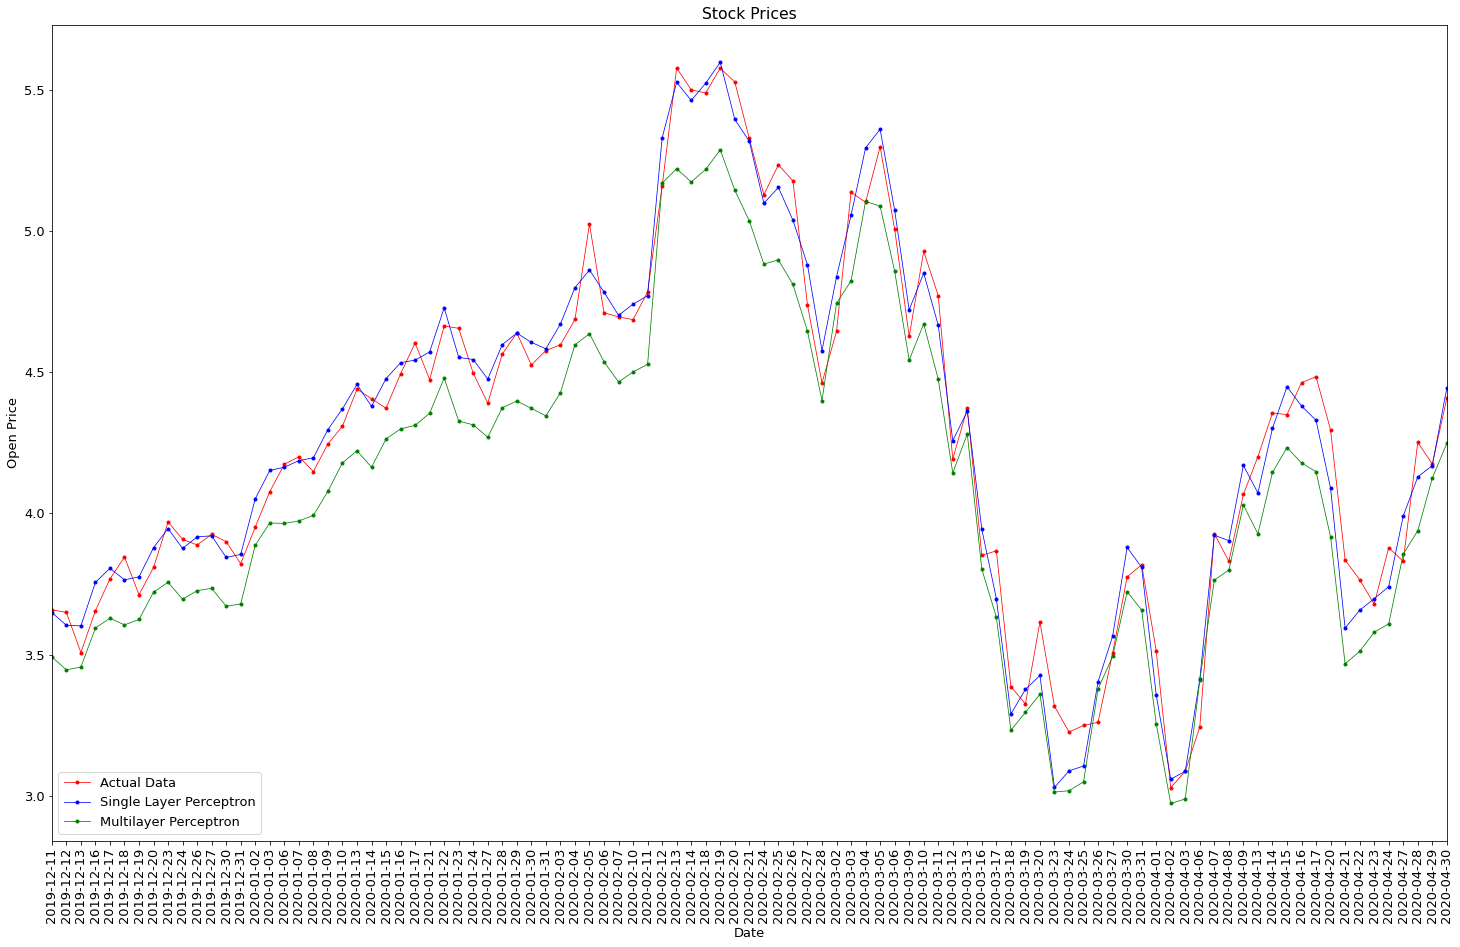

STOCK NAME:  CSGS_CSG Systems International Inc
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2250
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0099
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0087
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0084
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0081
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3105
Epoch 2/10
39/39 [==============================] - 0s 990us/step - loss: 0.0120
E

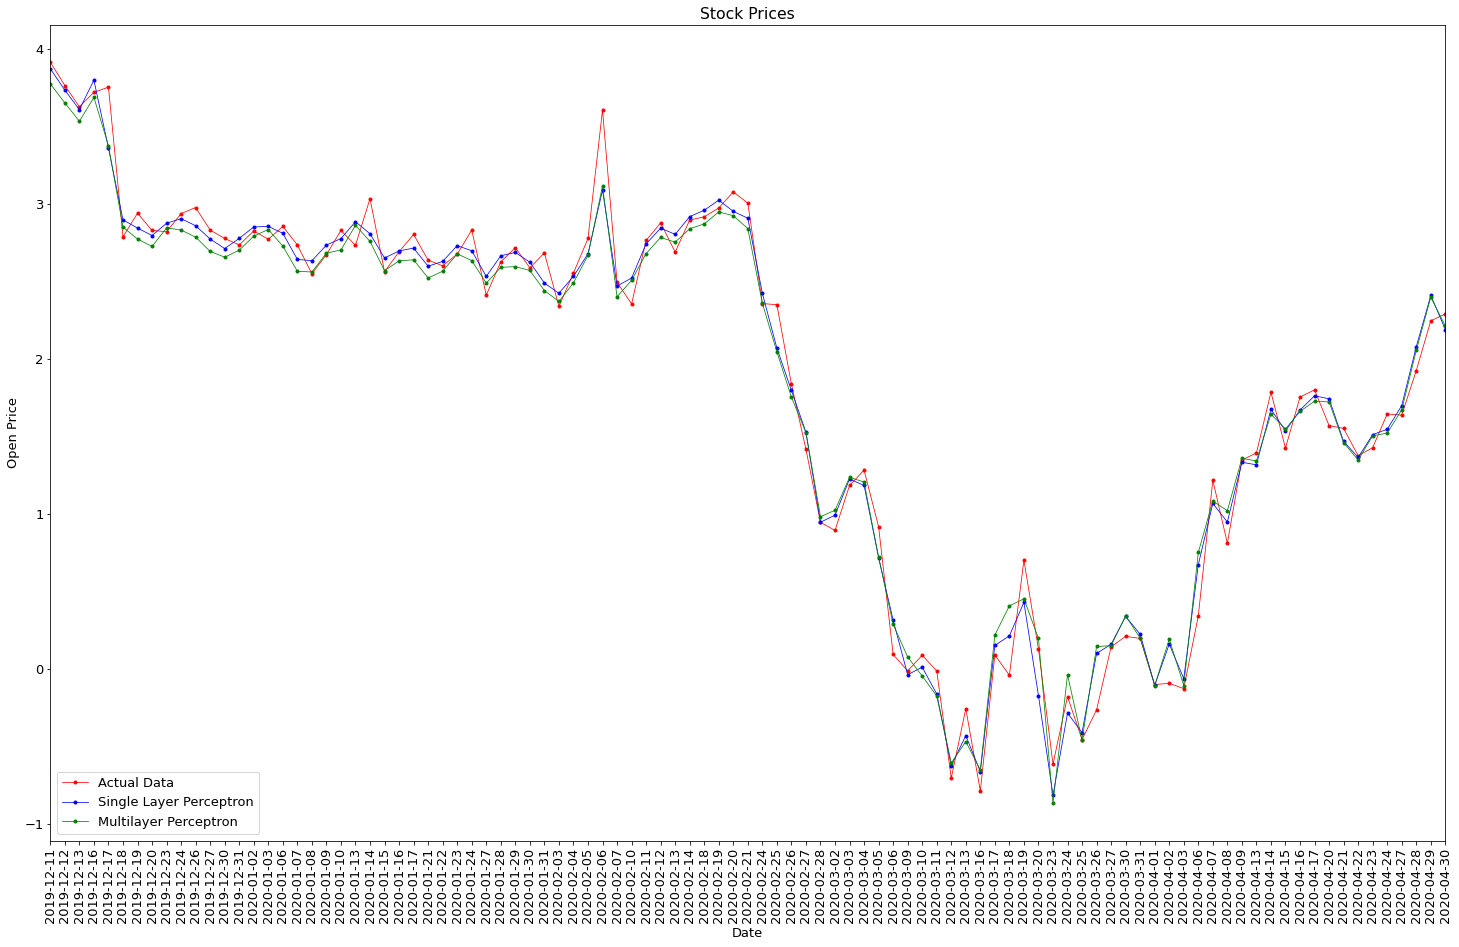

STOCK NAME:  CSU_Constellation Software
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2188
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 8/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3170
Epoch 2/10
39/39 [==============================] - 0s 943us/step - loss: 0.0048
Epoch 3/1

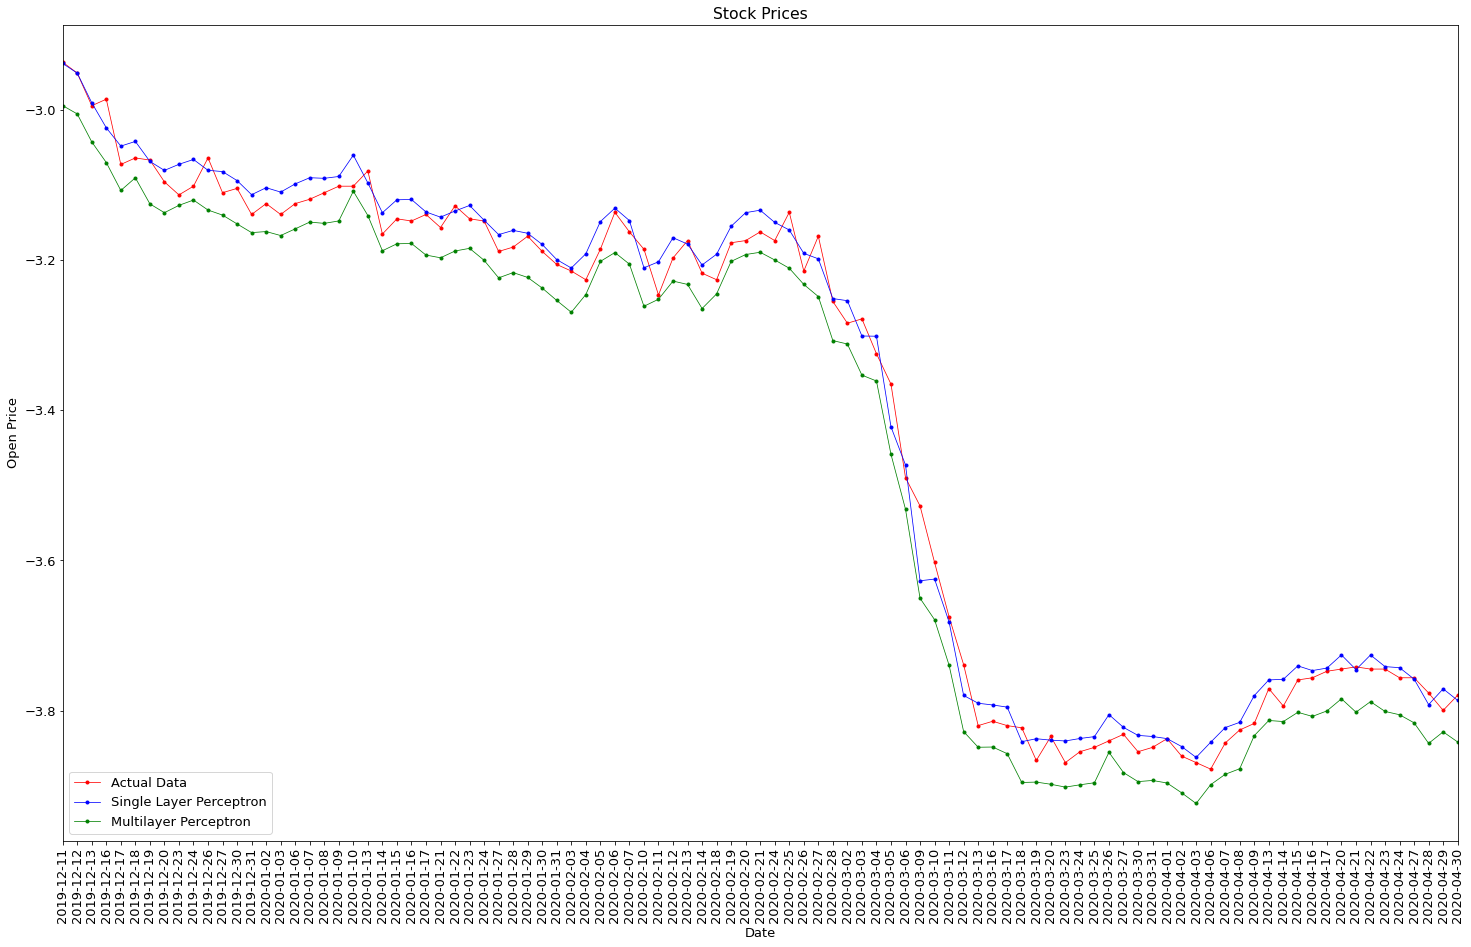

STOCK NAME:  DOL_Dollarama
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 10/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3249
Epoch 2/10
39/39 [==============================] - 0s 980us/step - loss: 0.0032
Epoch 3/10
39/39 [====

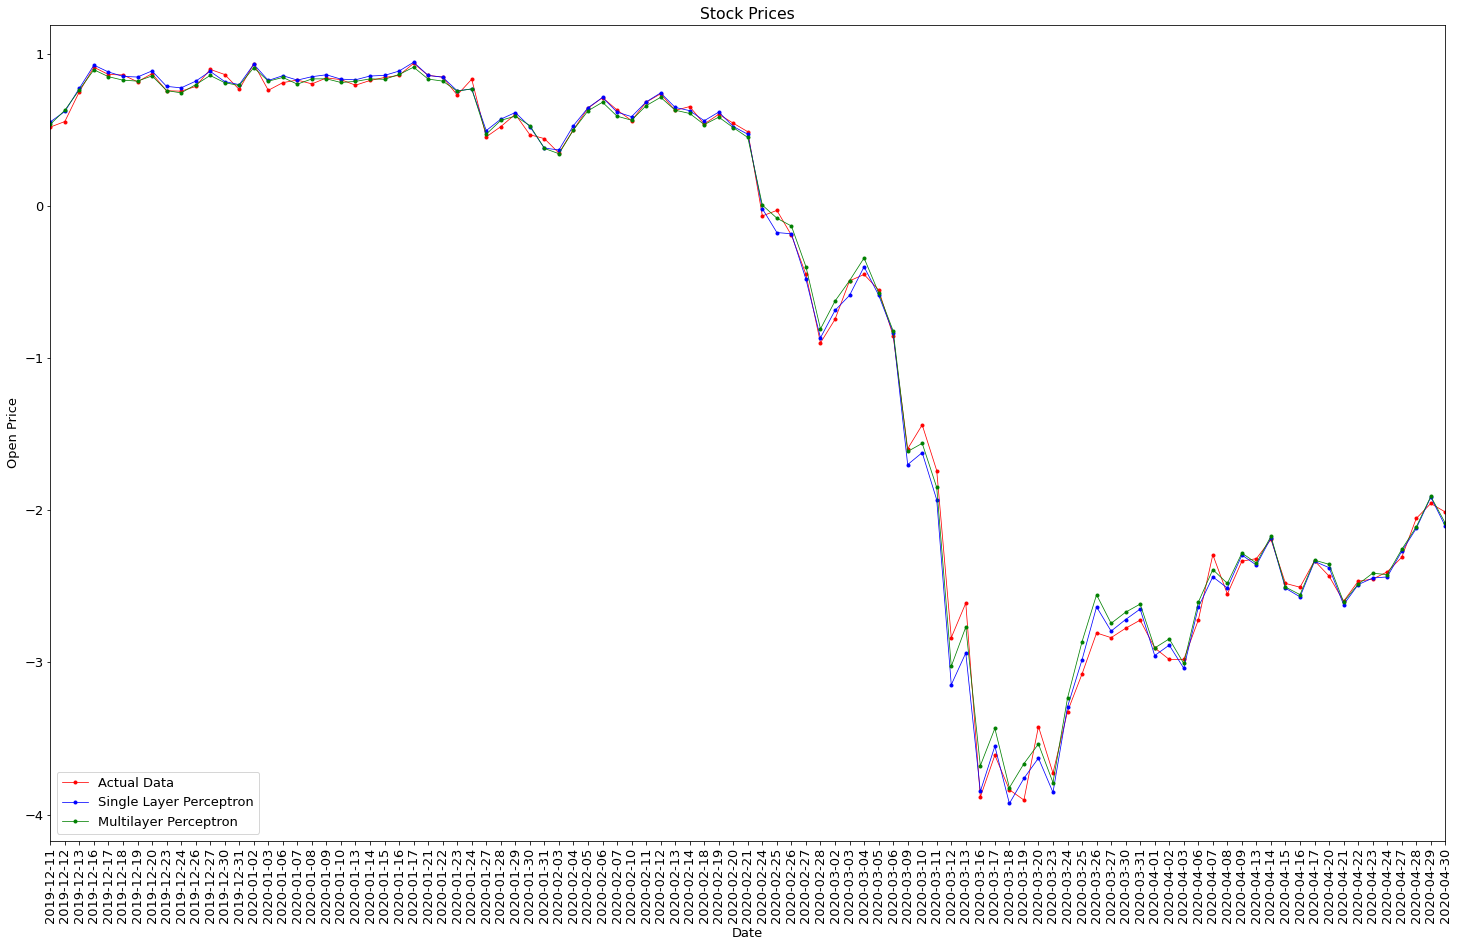

STOCK NAME:  ENB_Enbridge
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2046
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0068
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 9/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3074
Epoch 2/10
39/39 [==============================] - 0s 991us/step - loss: 0.0061
Epoch 3/10
39/39 [=====

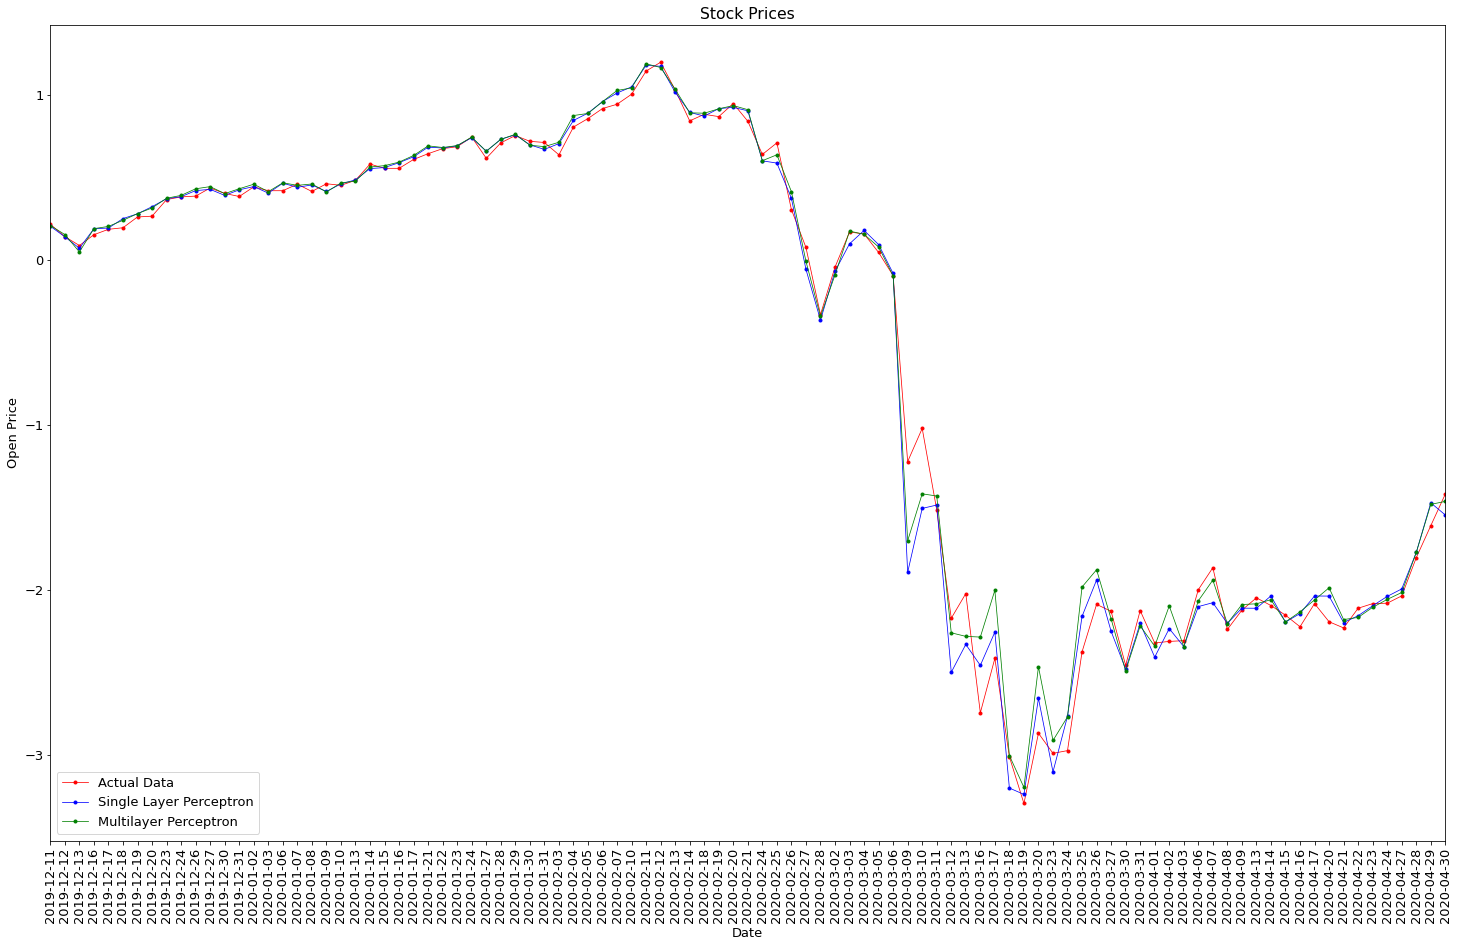

STOCK NAME:  ETFC_ETRADE Financial Corporation
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2294
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3263
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0024
Epoc

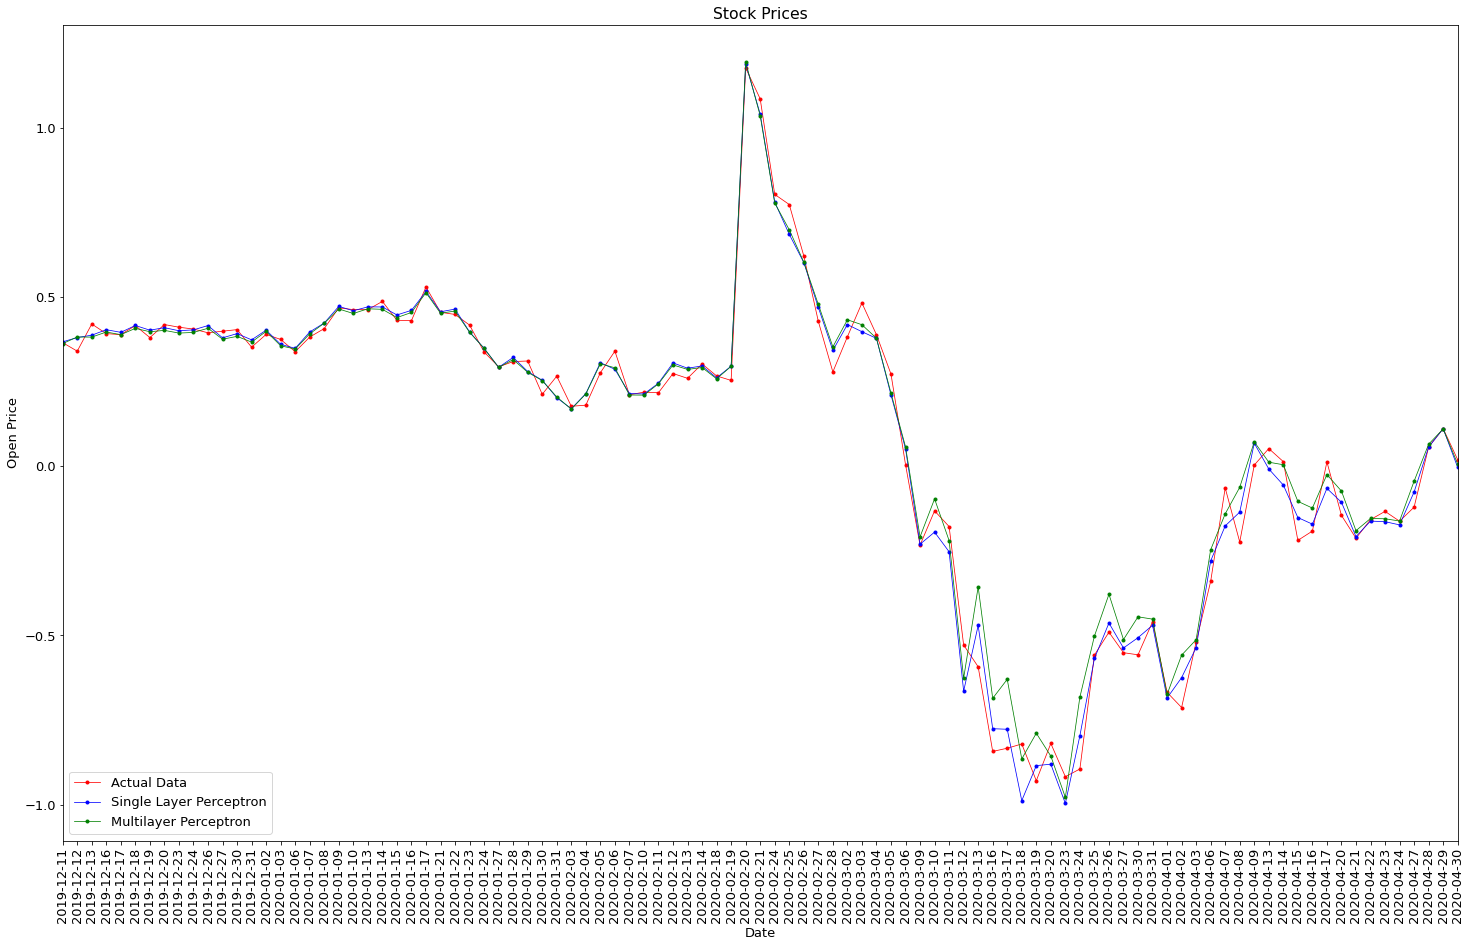

STOCK NAME:  GIB_CGI Inc
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2212
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3188
Epoch 2/10
39/39 [==============================] - 0s 980us/step - loss: 0.0033
Epoch 3/10
39/39 [======

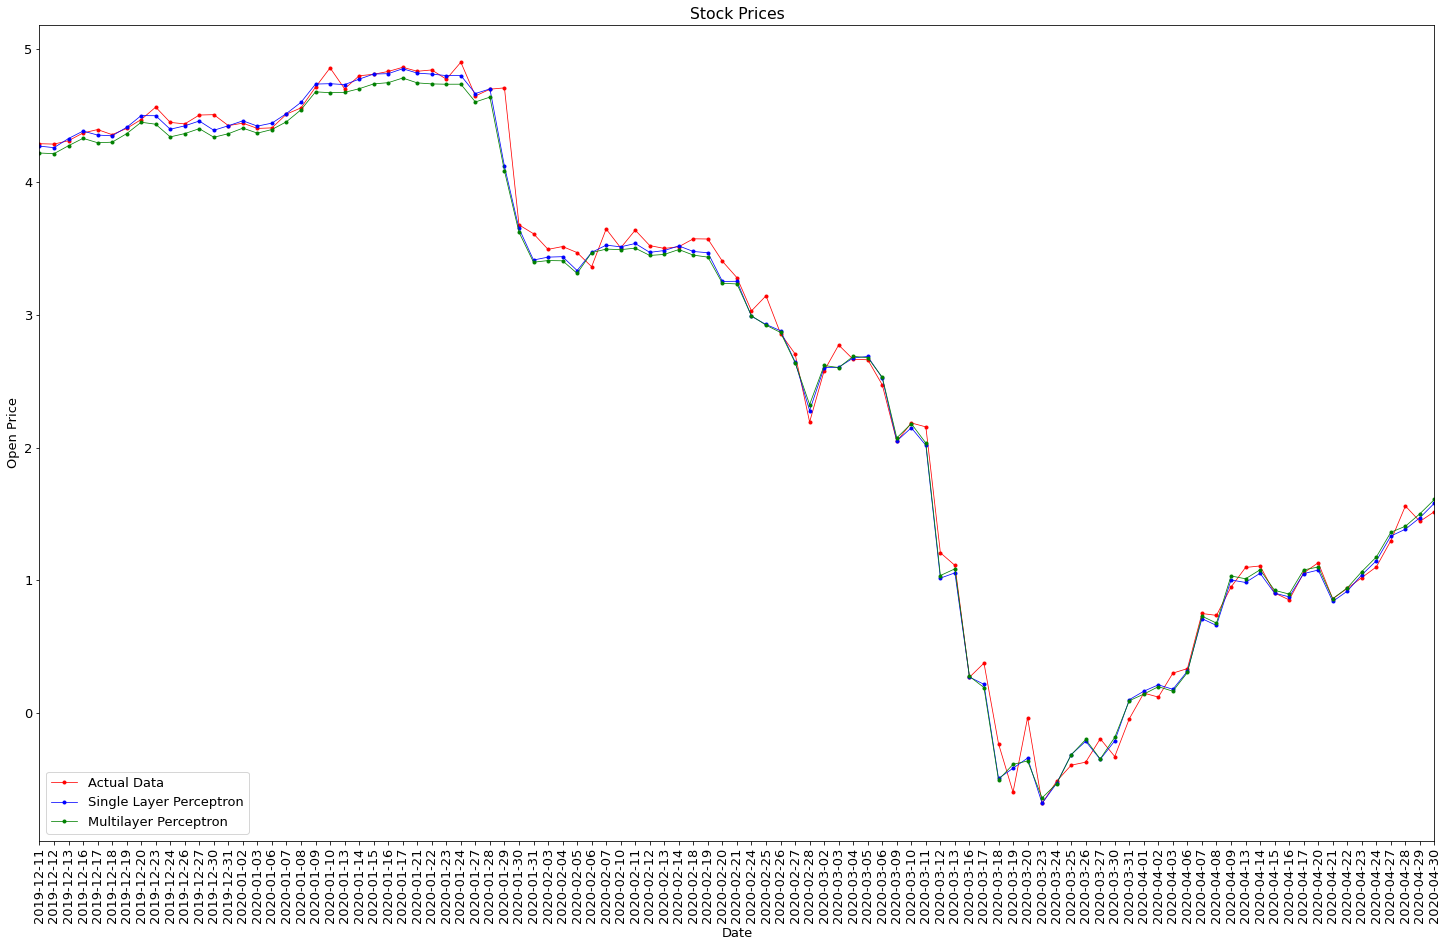

STOCK NAME:  GSY_Goeasy Ltd
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2179
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3412
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 3/10
39/39 [=====

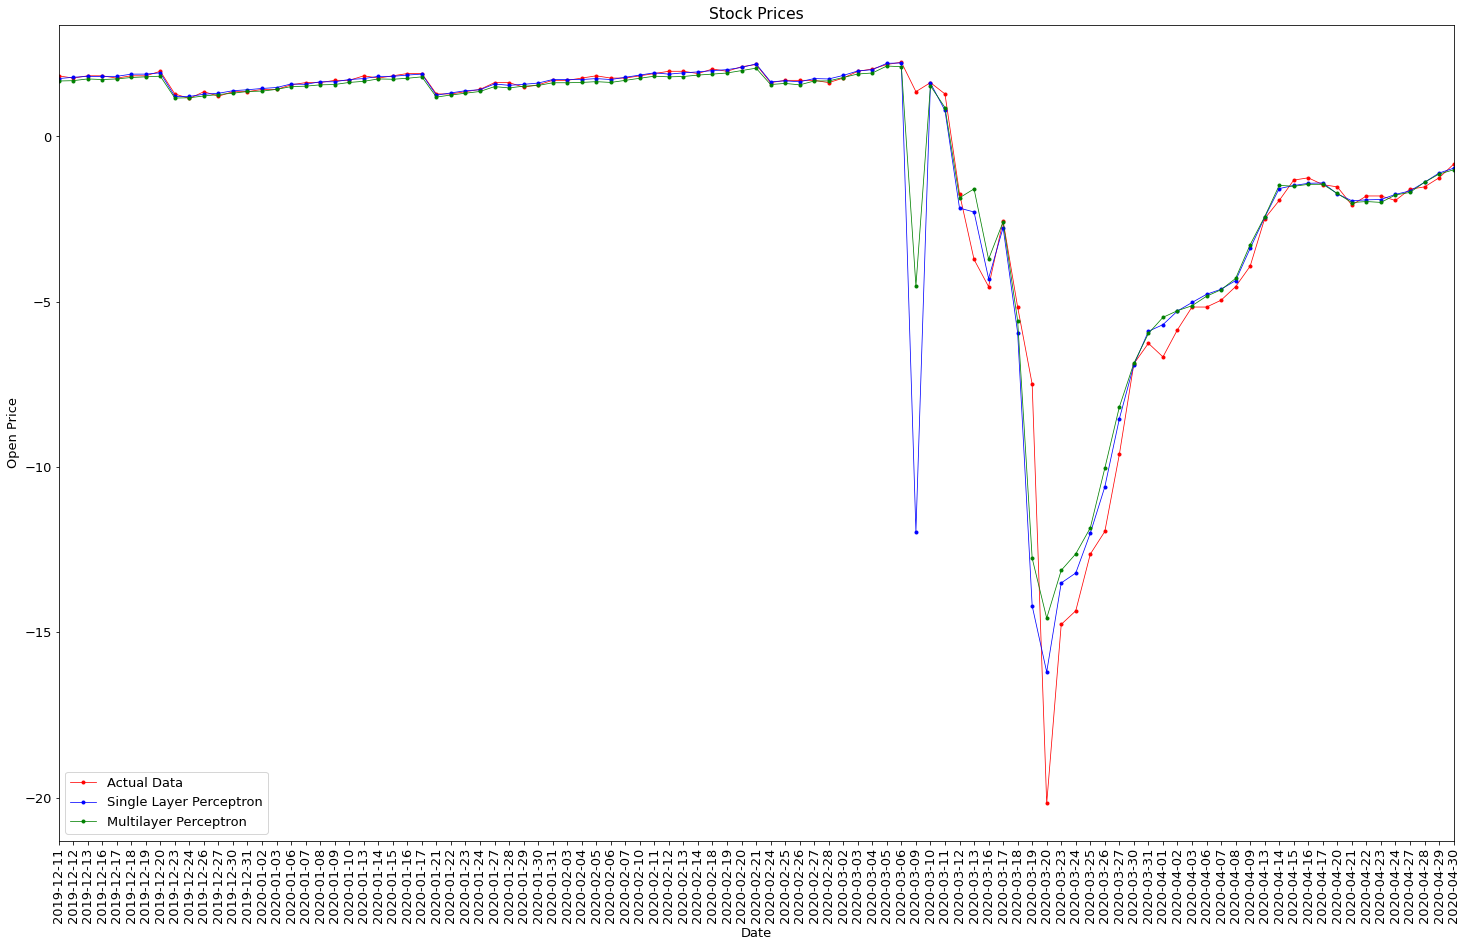

STOCK NAME:  KL_Kirkland Lake
Epoch 1/10
35/35 [==============================] - 0s 2ms/step - loss: 0.2387
Epoch 2/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 3/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 6/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 7/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 8/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 9/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 10/10
35/35 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 1/10
35/35 [==============================] - 0s 1ms/step - loss: 0.3470
Epoch 2/10
35/35 [==============================] - 0s 996us/step - loss: 0.0044
Epoch 3/10
35/35 [=

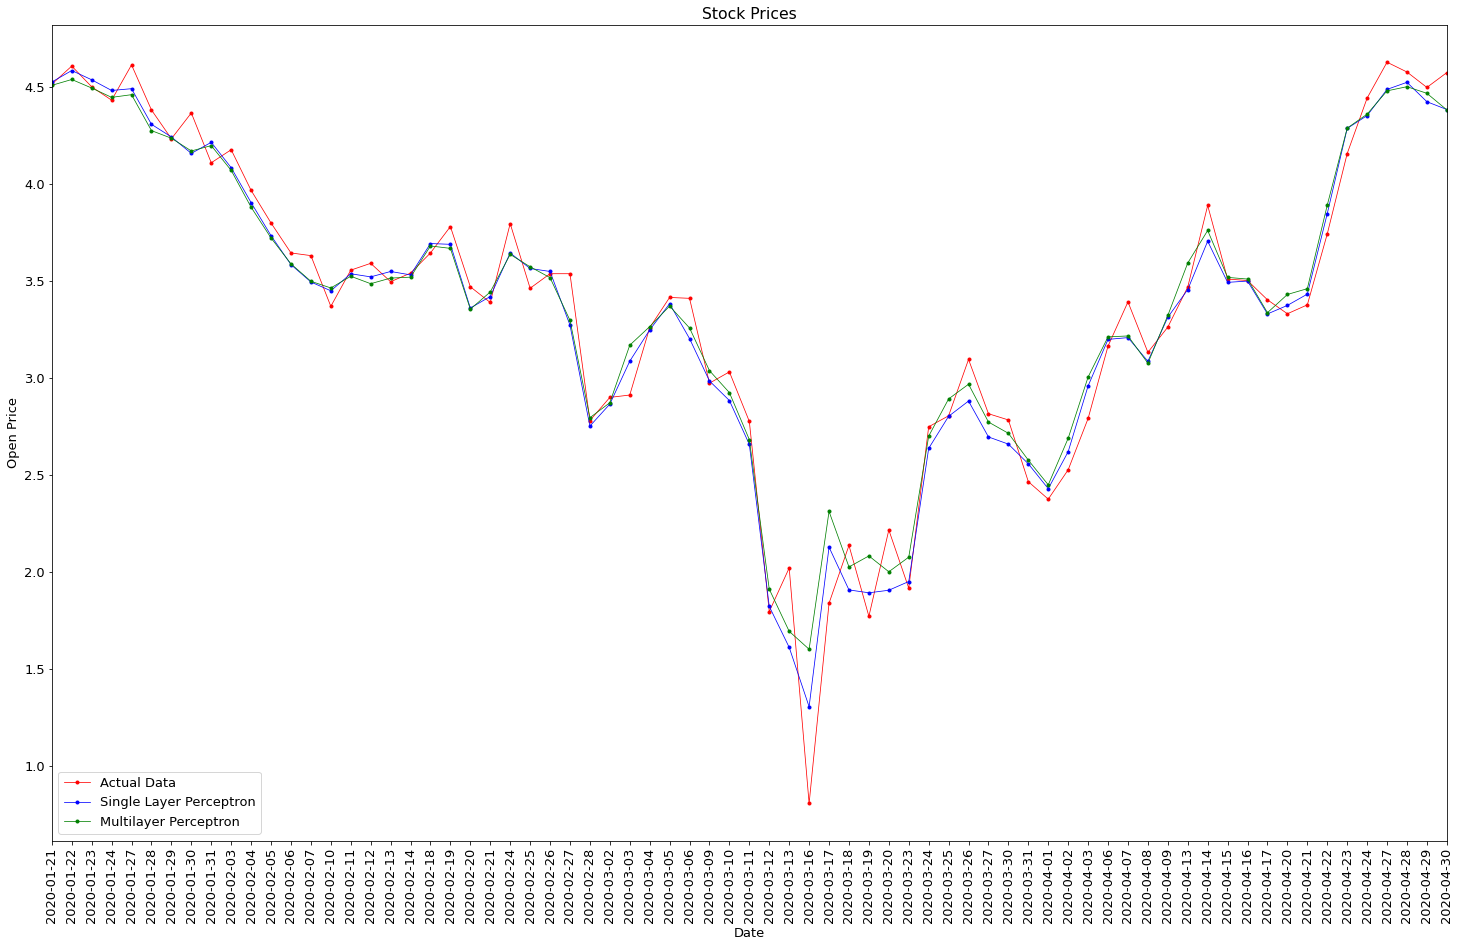

STOCK NAME:  MFC_Manulife Financial
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2170
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3210
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 3/10
39/3

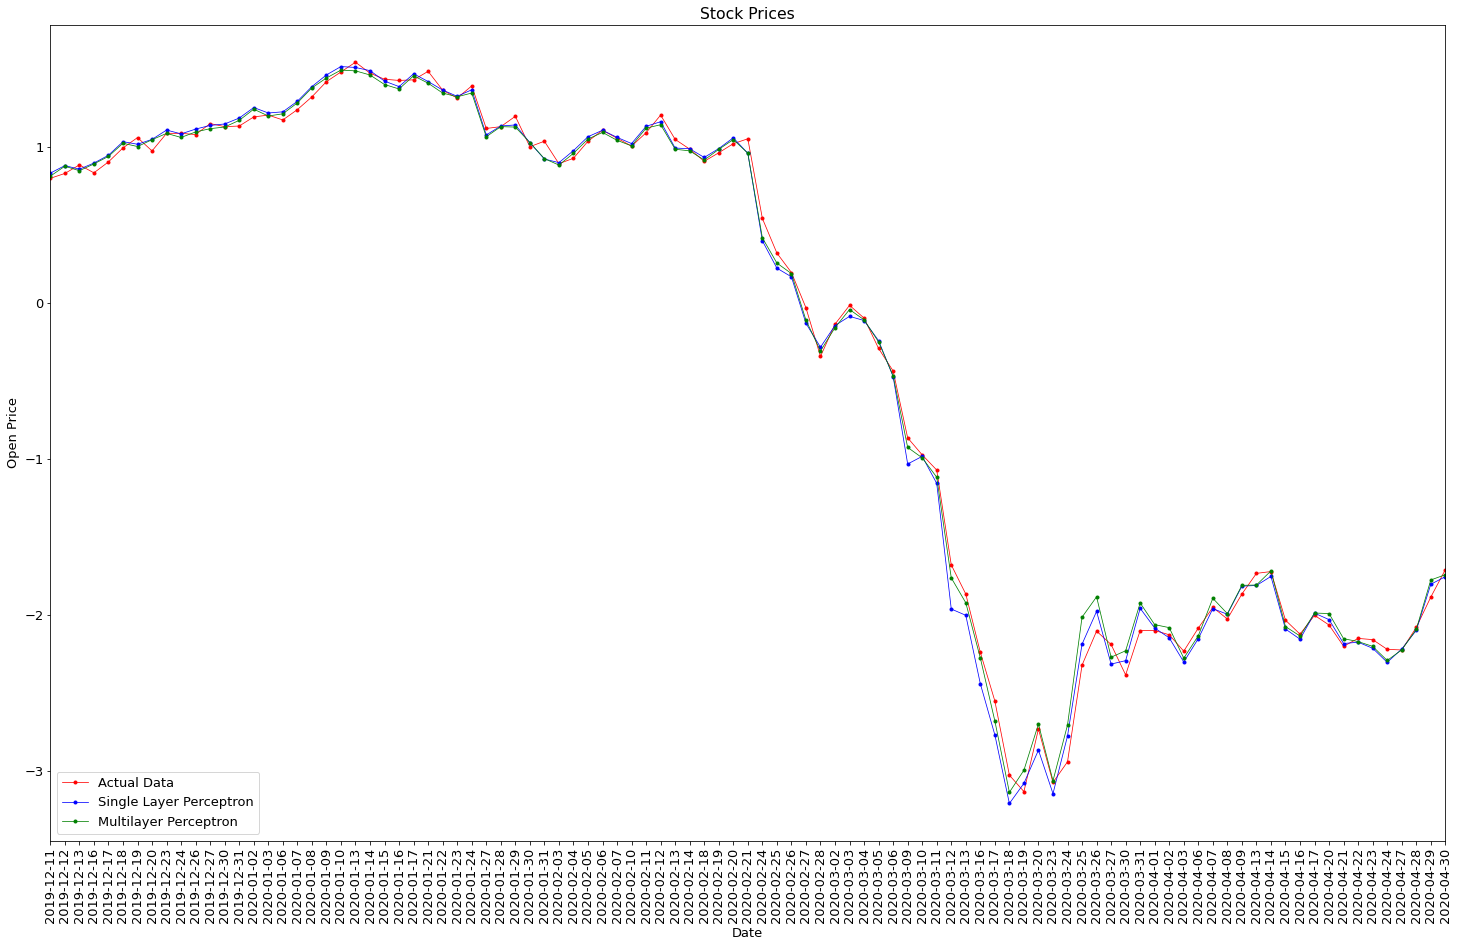

STOCK NAME:  NEPT_Neptune Wellness Solutions Inc.
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0048
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3163
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0036
E

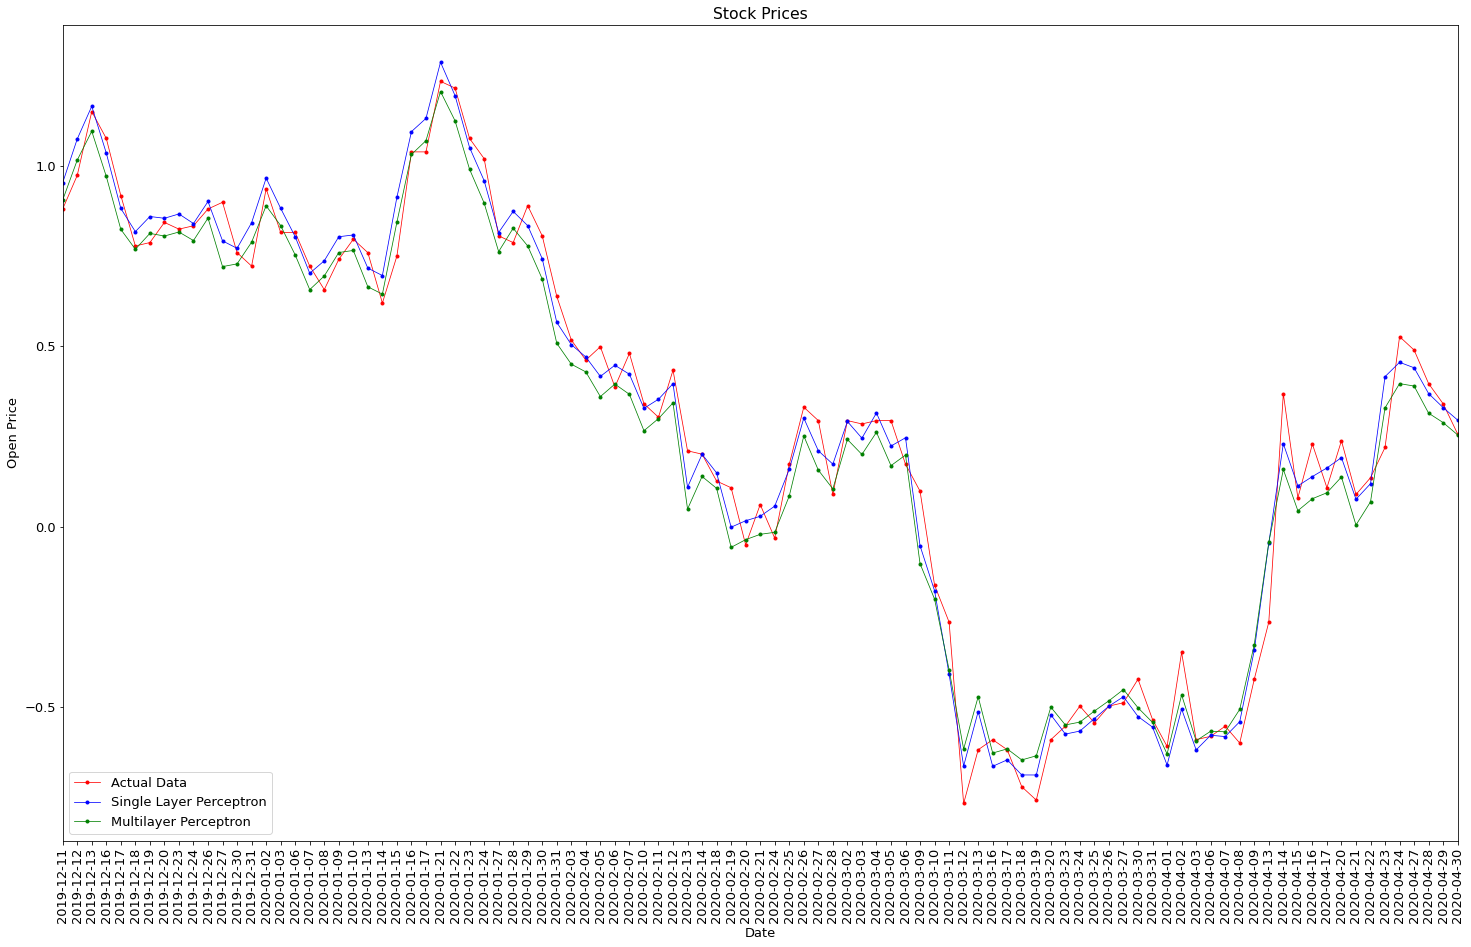

STOCK NAME:  NOA_North American Construction Group Ltd.
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2238
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3161
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.

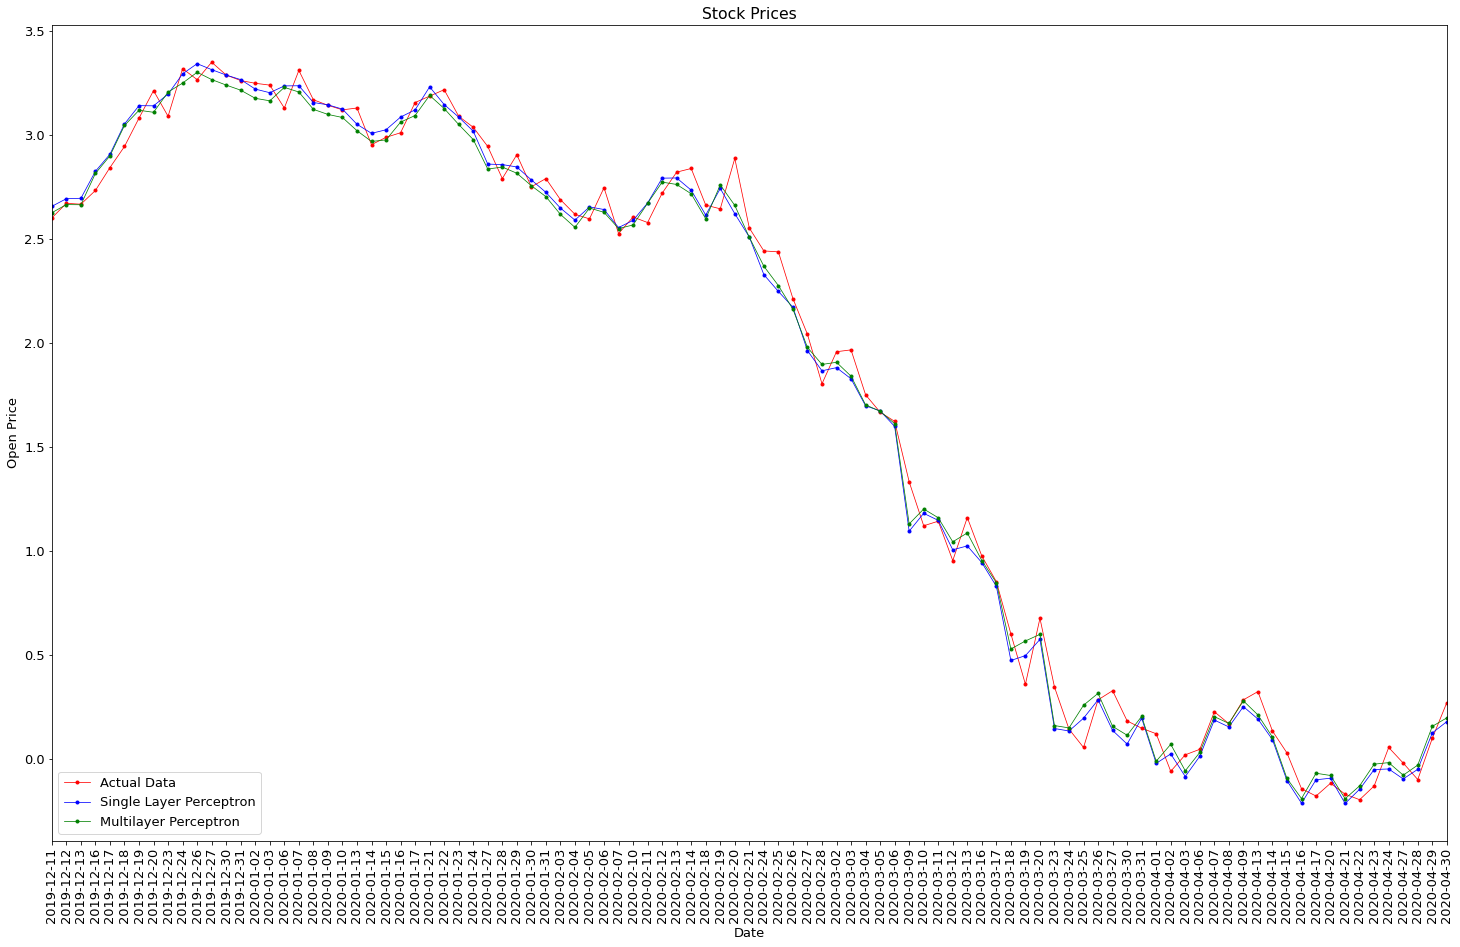

STOCK NAME:  OTEX_Opentext
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2228
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3319
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 3/10
39/39 [======

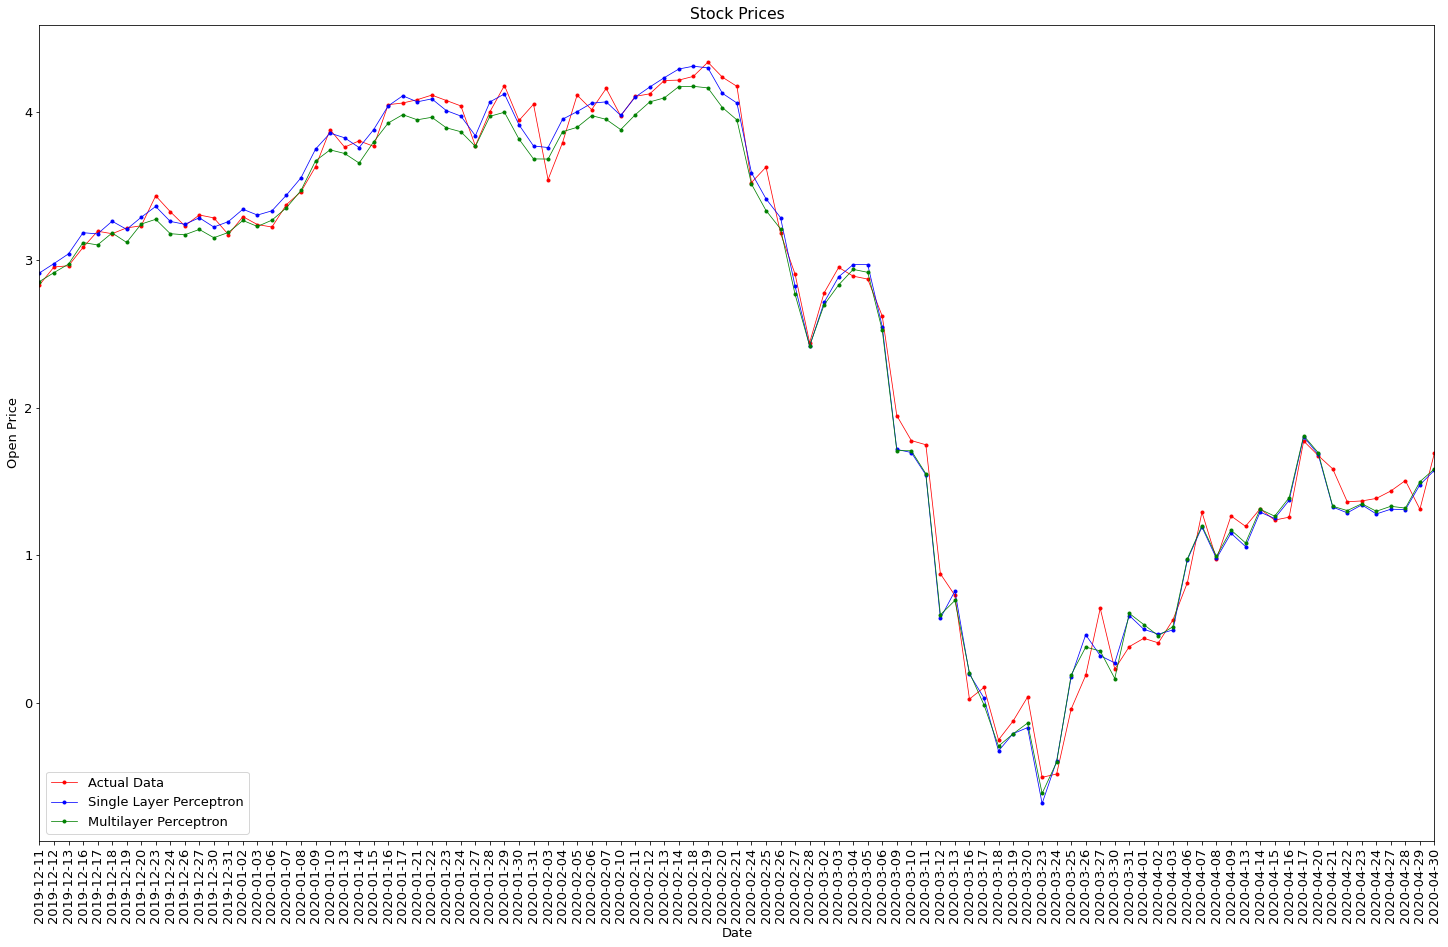

STOCK NAME:  SHOP_Shopify
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2166
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0037
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3167
Epoch 2/10
39/39 [==============================] - 0s 995us/step - loss: 0.0028
Epoch 3/10
39/39 [=====

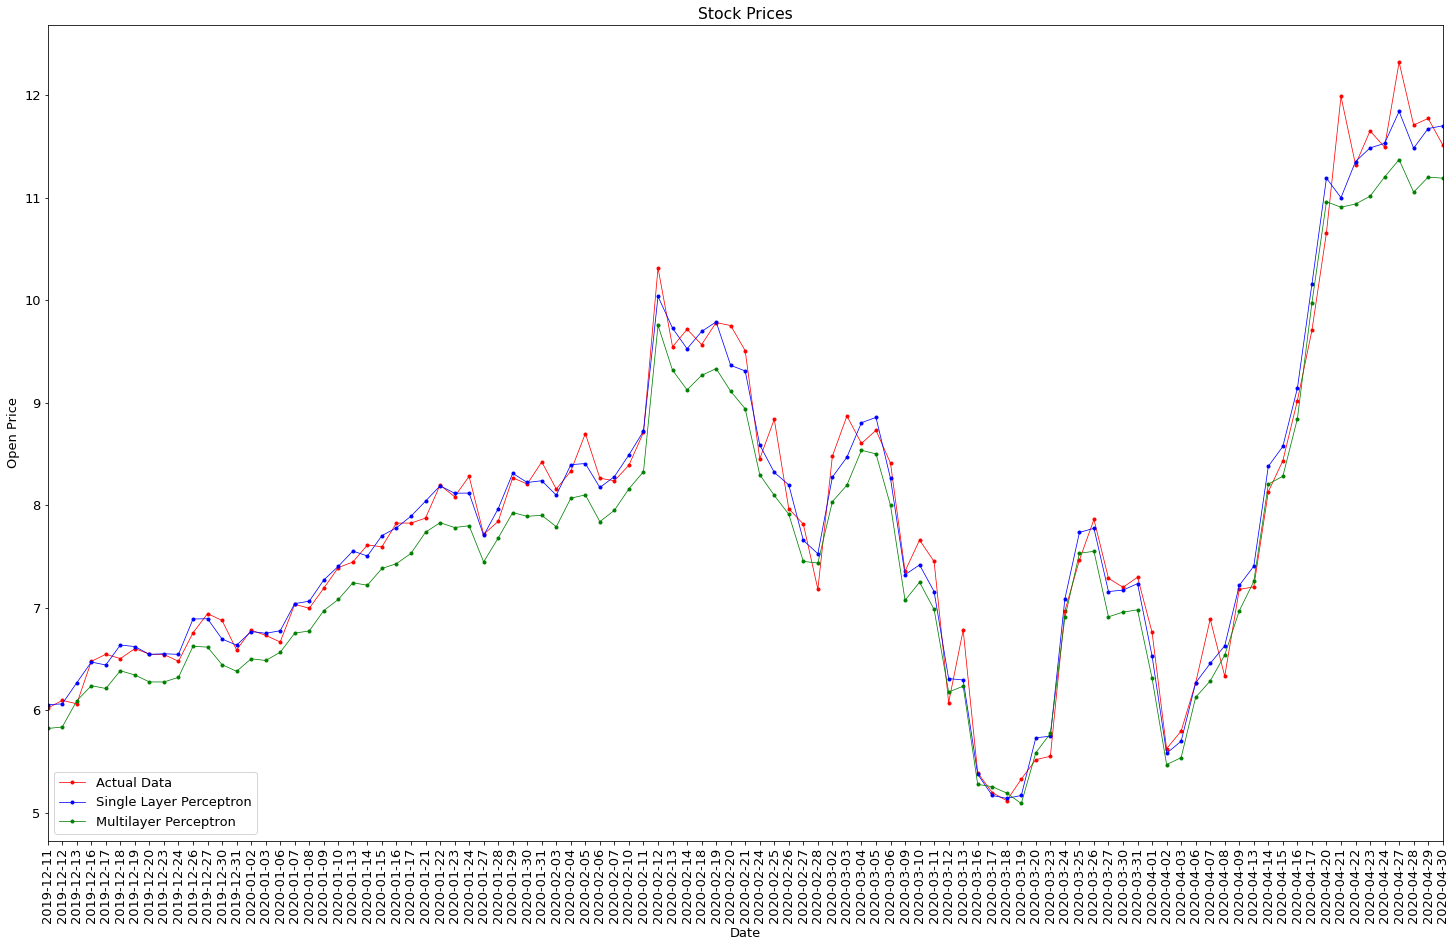

STOCK NAME:  TD_Toronto-Dominion Bank
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2123
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 5/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 9/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3210
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 3/10
39

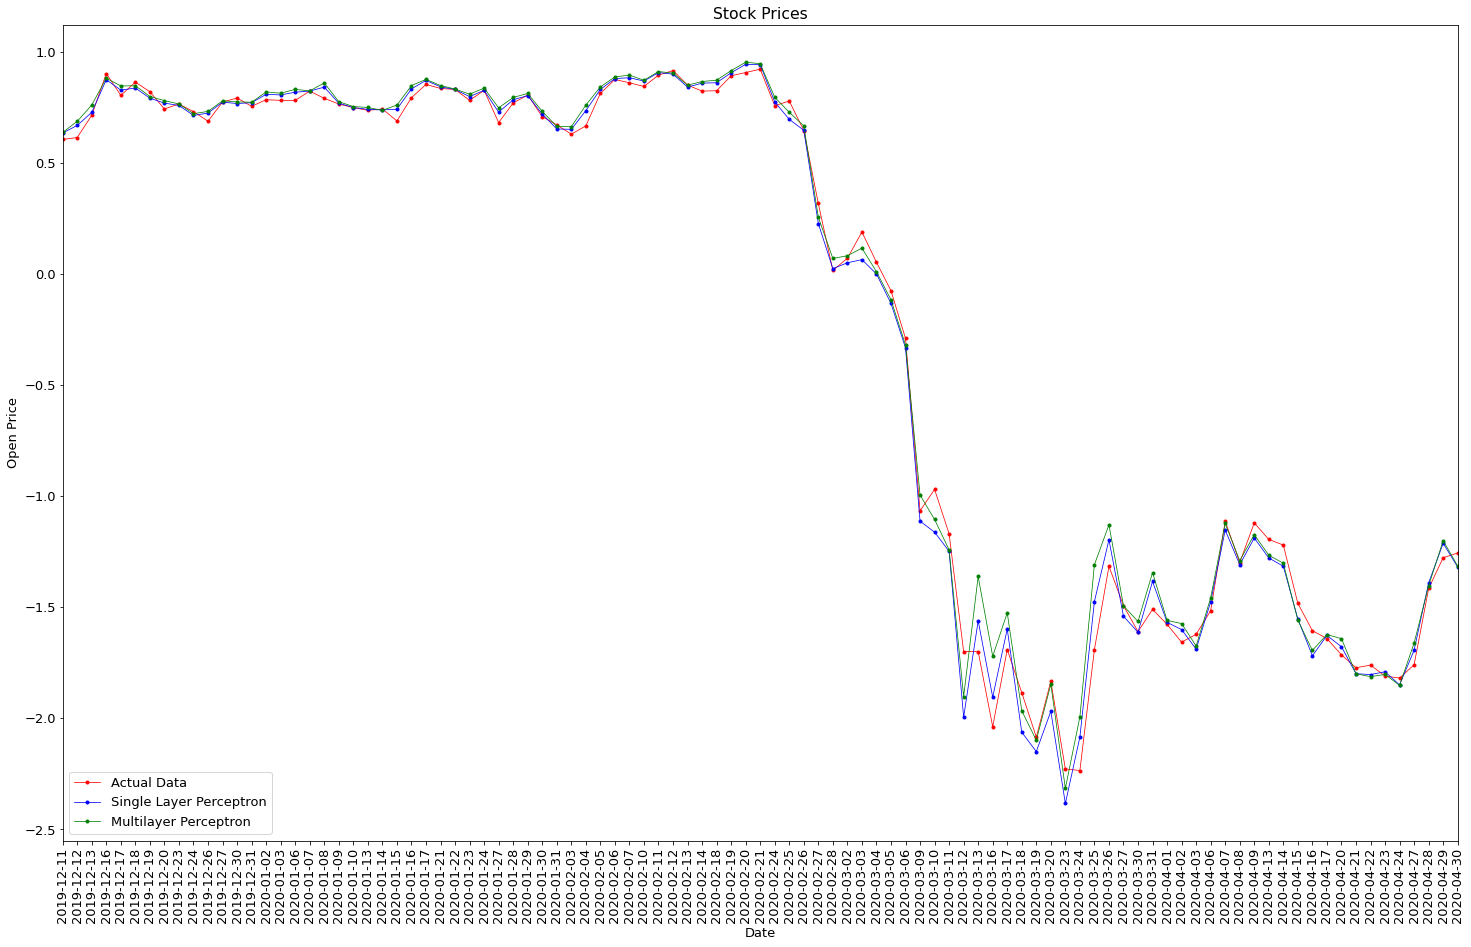

STOCK NAME:  TH_Theratechnologies Inc.
Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4476
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0268
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0096
Epoch 5/10
16/16 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0080
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0072
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 1/10
16/16 [==============================] - 0s 1ms/step - loss: 0.6256
Epoch 2/10
16/16 [==============================] - 0s 1ms/step - loss: 0.1830
Epoch 3/10
1

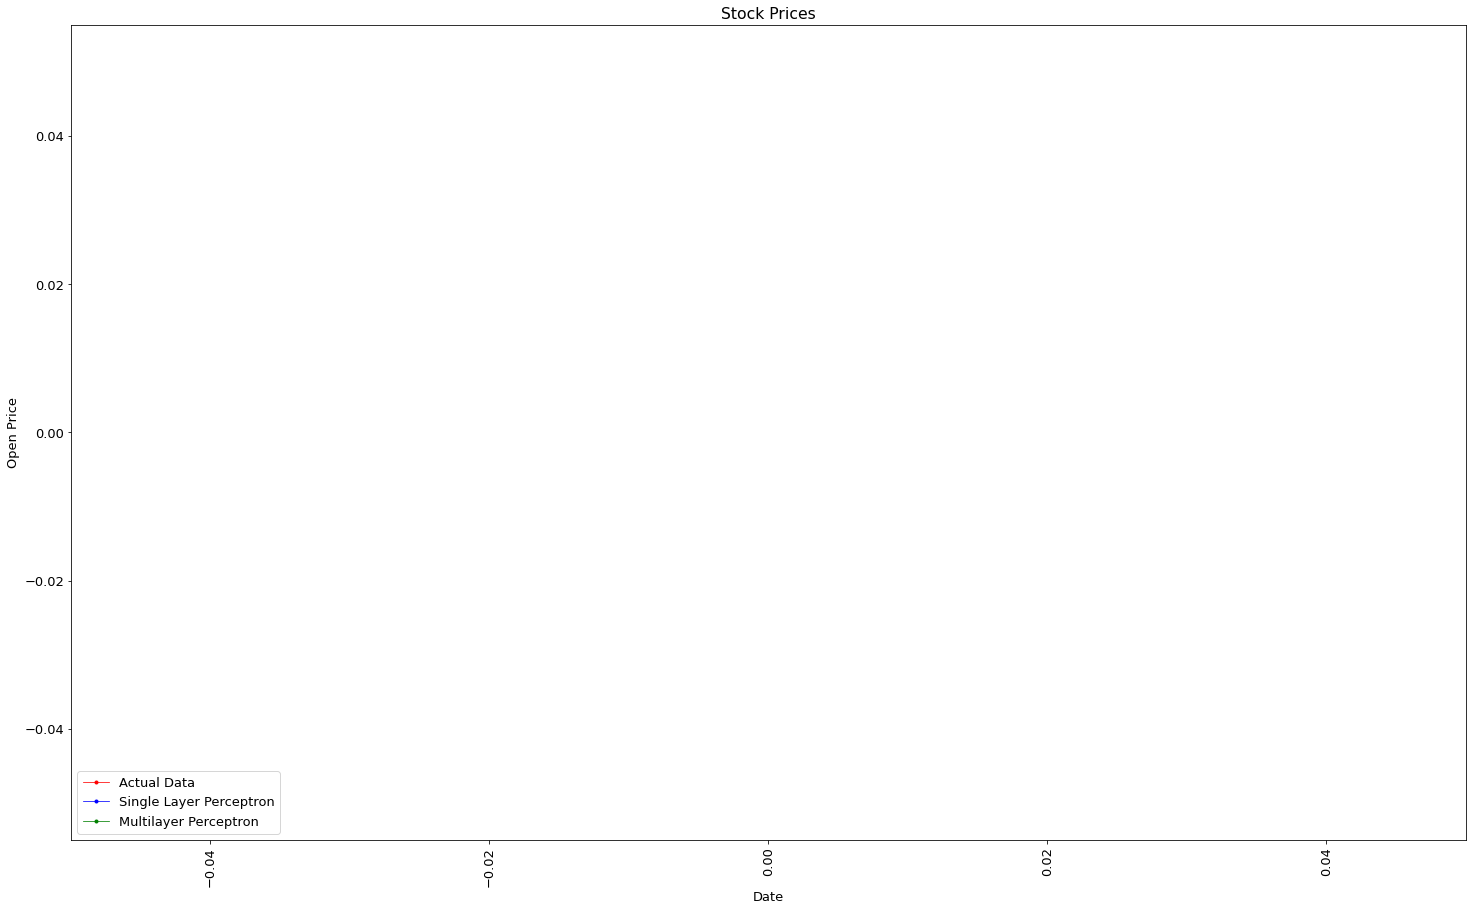

In [10]:
all_df = [df1, df2, df3, df4, df5 ,df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
ANN_MSE = []
SLP_MSE = []

for df in all_df:
    print("STOCK NAME: ", df['Stock name'][0])
    x_train, y_train, x_valid, y_valid, date_train, date_valid = preprocessing(df)
    
    ## Standard Scaler
    data_scaler = StandardScaler()
    s_train = data_scaler.fit_transform(np.asarray(x_train))
    s_valid = data_scaler.transform(np.asarray(x_valid))
    
    target_scaler = StandardScaler()
    s_label_train = target_scaler.fit_transform(np.asarray(y_train).reshape(-1,1))
    s_label_valid = target_scaler.transform(np.asarray(y_valid).reshape(-1,1))
    
    ## MLP
    ann = Sequential()
    ann.add(Dense(20, activation = 'relu', input_dim = 3))
    ann.add(Dense(units = 75, activation = 'relu'))
    ann.add(Dense(units = 75, activation = 'relu'))
    ann.add(Dense(units = 75, activation = 'relu'))
    ann.add(Dense(units = 1))
    ann.compile(optimizer = 'adam',loss = 'mean_squared_error')
    ann.fit(s_train, s_label_train, batch_size = 20, epochs = 10)
    pred_ann = ann.predict(s_valid)
    ann_mse = mean_squared_error(s_label_valid, pred_ann)
    ANN_MSE.append(ann_mse)
    
    ## Single Layer Perceptron
    slp = Sequential()
    slp.add(Dense(32, input_dim = 3))
    slp.add(Dense(units = 1))
    slp.compile(optimizer = 'adam',loss = 'mse')
    slp.fit(s_train, s_label_train, batch_size =20, epochs = 10)
    pred_slp = slp.predict(s_valid)
    slp_mse = mean_squared_error(s_label_valid, pred_slp)
    SLP_MSE.append(slp_mse)
    
    ## Plot
    plt.rcParams.update({'font.size': 13})
    fig, ax = plt.subplots(figsize = (25,15))
    ax.plot(date_valid[230:350], s_label_valid[230:350], color = 'red', marker='.', linewidth='0.75')
    ax.plot(date_valid[230:350], pred_slp[230:350], color = 'blue', marker='.', linewidth='0.75')
    ax.plot(date_valid[230:350], pred_ann[230:350], color = 'green', marker='.', linewidth='0.75')
    plt.xticks(rotation='90')
    plt.gca().margins(x=0)
    plt.legend(['Actual Data', 'Single Layer Perceptron', 'Multilayer Perceptron'], loc='lower left')
    ax.set(xlabel="Date", ylabel="Open Price", title="Stock Prices");
    plt.show()

In [11]:
print("MSE ANN: ", ANN_MSE)

print("SLP MSE: ", SLP_MSE)

MSE ANN:  [0.05367636884417393, 0.044819717595887765, 0.00372740960689631, 0.027010311730047212, 0.02575709426498135, 0.02033035882672896, 0.002388456852412762, 0.0024937947225092873, 0.005533274330618251, 0.001833664144815312, 0.007319153521763828, 0.3564238475600391, 0.013165232494015083, 0.0025295770807630584, 0.011977809168223958, 0.006148813385430573, 0.008734543456002903, 0.06244092735818546, 0.0033231629192955647, 0.006855644699384174]
SLP MSE:  [0.05675047114336903, 0.01675097898386519, 0.0033632577675252995, 0.008508995309735813, 0.005128231918310669, 0.017876263100404365, 0.000978171746831771, 0.002449566377103804, 0.006133956140481185, 0.001305932543380043, 0.005346765286262434, 0.7661754679548165, 0.010325917764335425, 0.002890456340721049, 0.006947511524304364, 0.005063650779745262, 0.007074148611023957, 0.02067470382361598, 0.002306255160332479, 0.006048346612551445]


# Classical Methods

STOCK NAME:  AC_Air canada
KNN MSE:  2.853274922376689


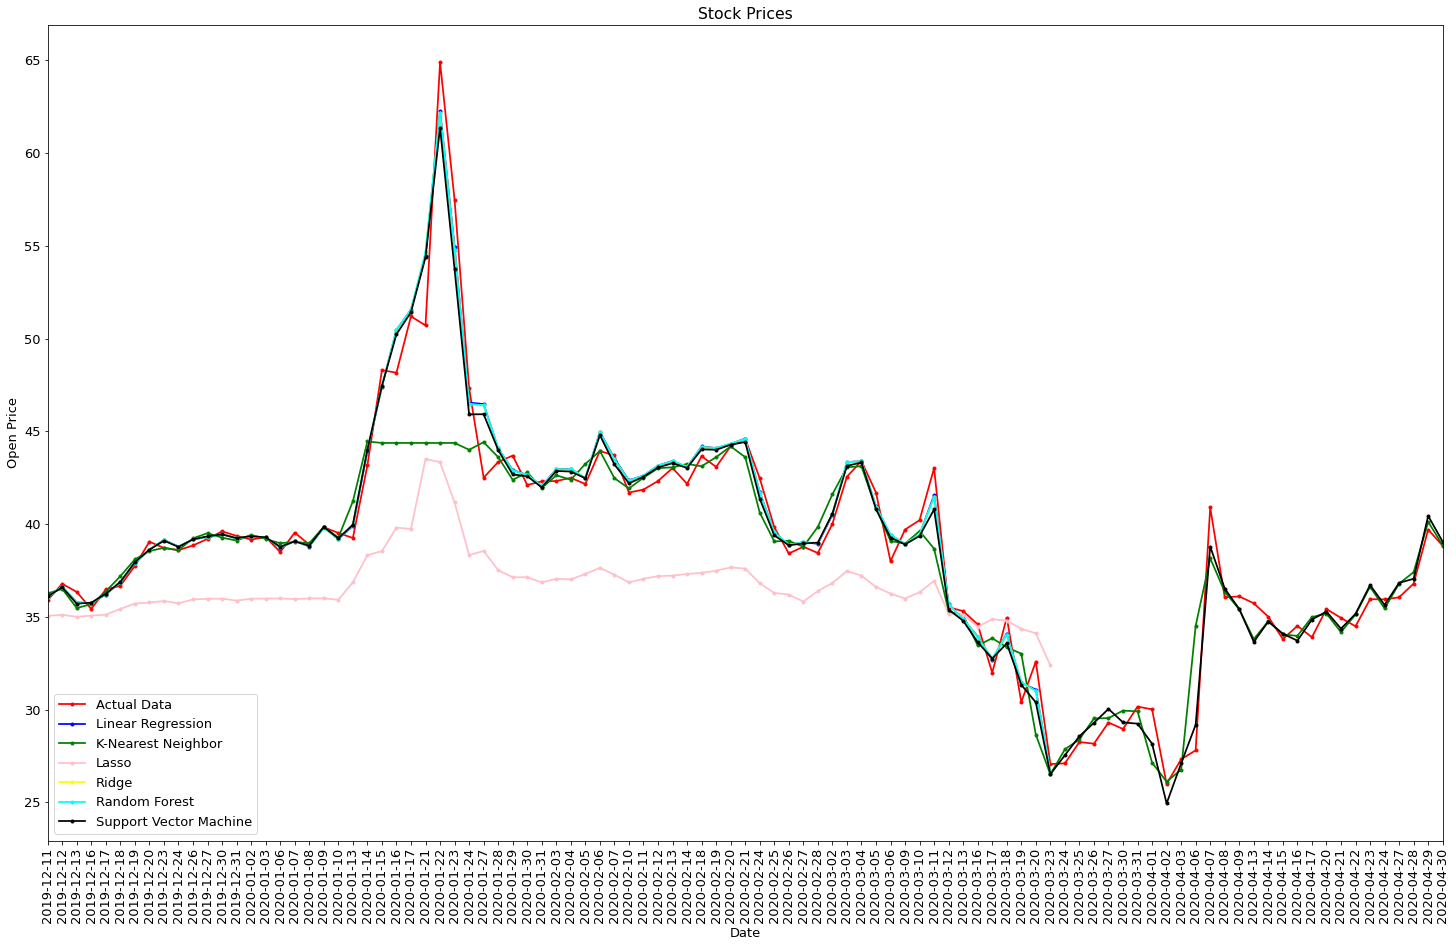

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767]
KNN MSE:
 [2.853274922376689]
Lasso MSE:
 [15.493929862469383]
Ridge MSE:
 [0.42466844159929573]
Random Forest MSE:
 [2.3902478927860313]
SVM MSE:
 [0.47145577565992747]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  BLDP_Ballard Power Systems Inc.
KNN MSE:  5.130390976645849


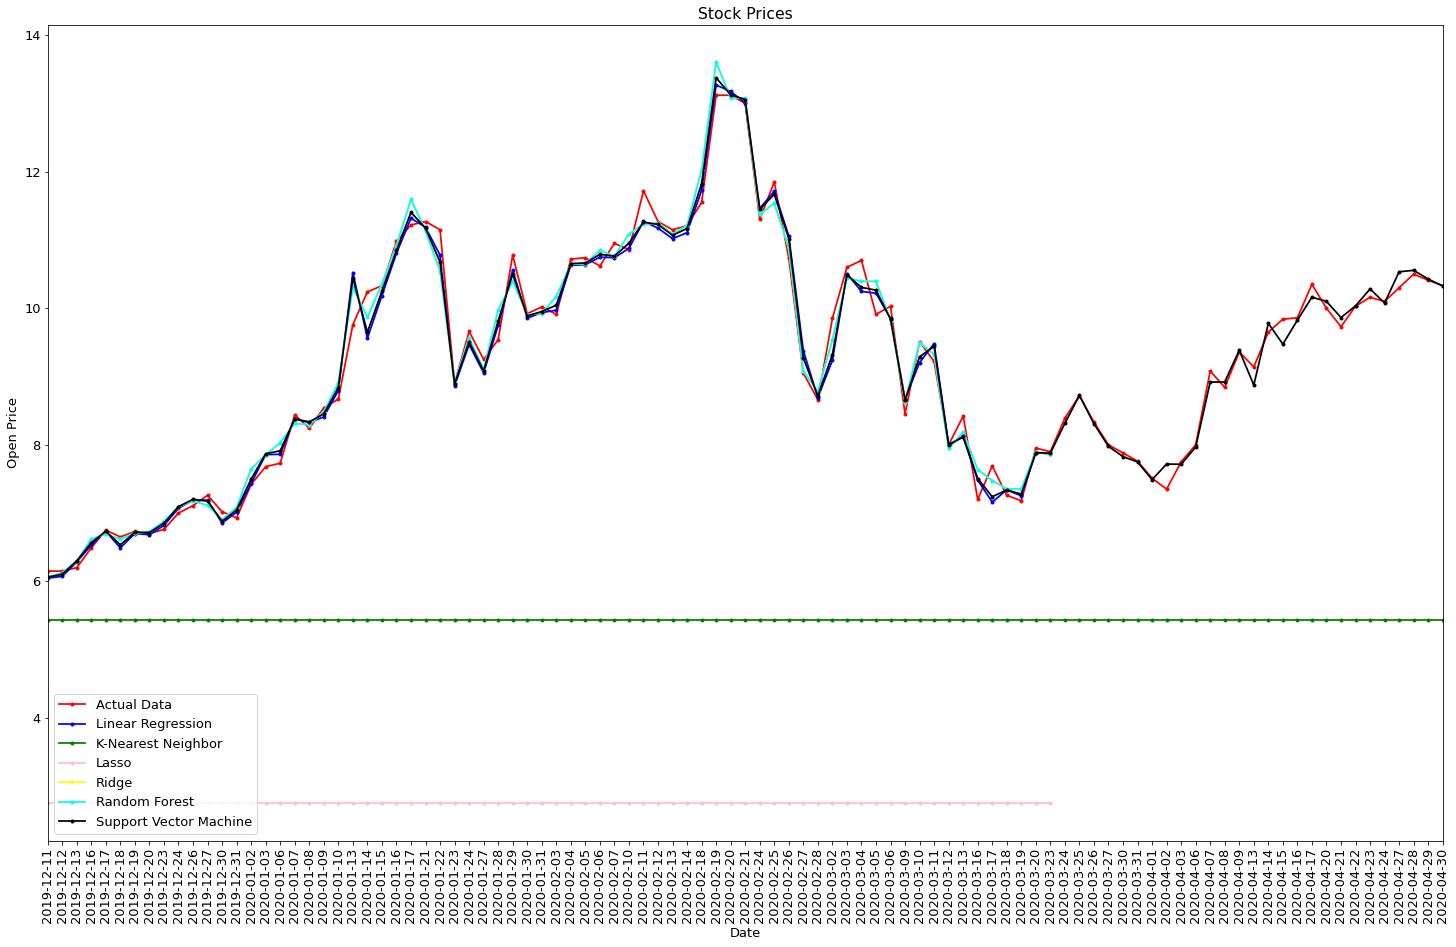

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555]
KNN MSE:
 [2.853274922376689, 5.130390976645849]
Lasso MSE:
 [15.493929862469383, 15.670372658663553]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  BYD_Boyd Group Services
KNN MSE:  0.9554228122123016


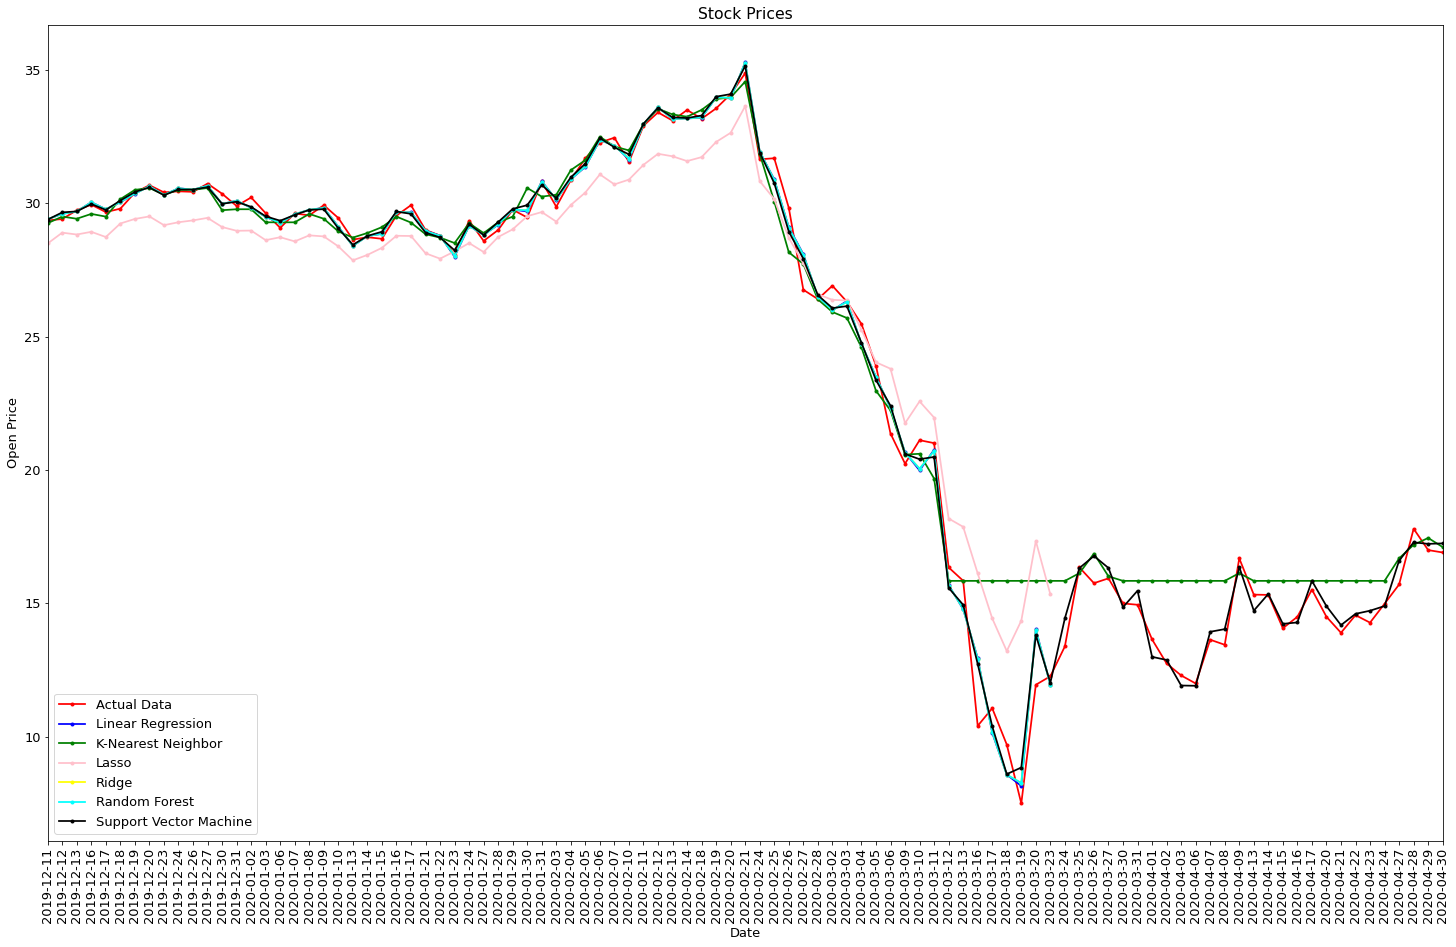

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073, 0.1266565497690703]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  TMQ_Trilogy Metals Inc
KNN MSE:  0.07069360019322053


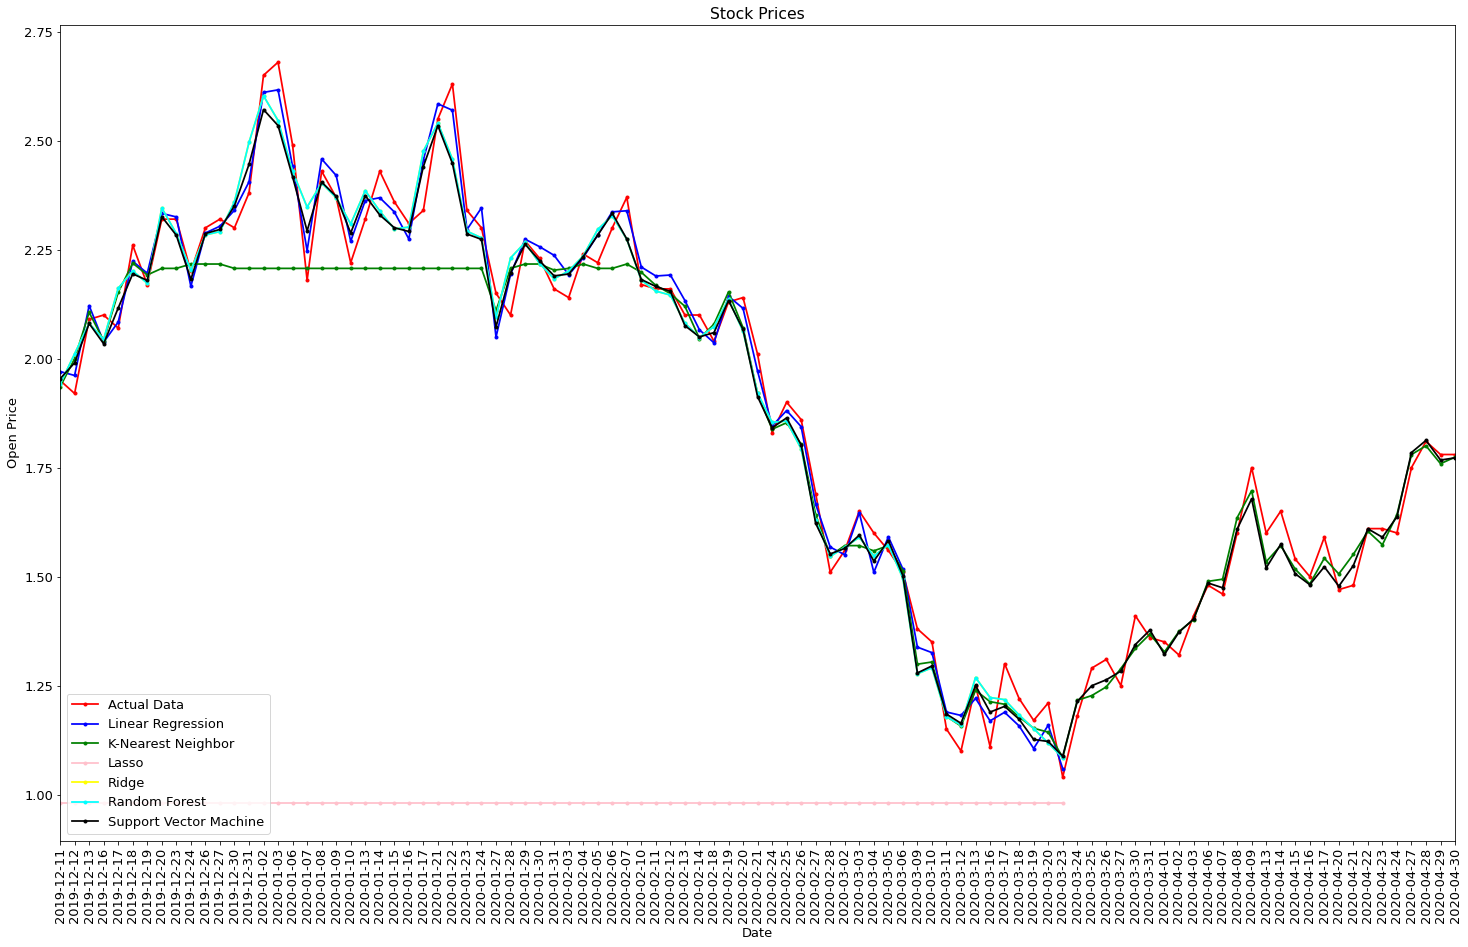

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073, 0.1266565497690703, 0.002920748187002187]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  CSGP_CoStar Group Inc
KNN MSE:  20875.23590359247


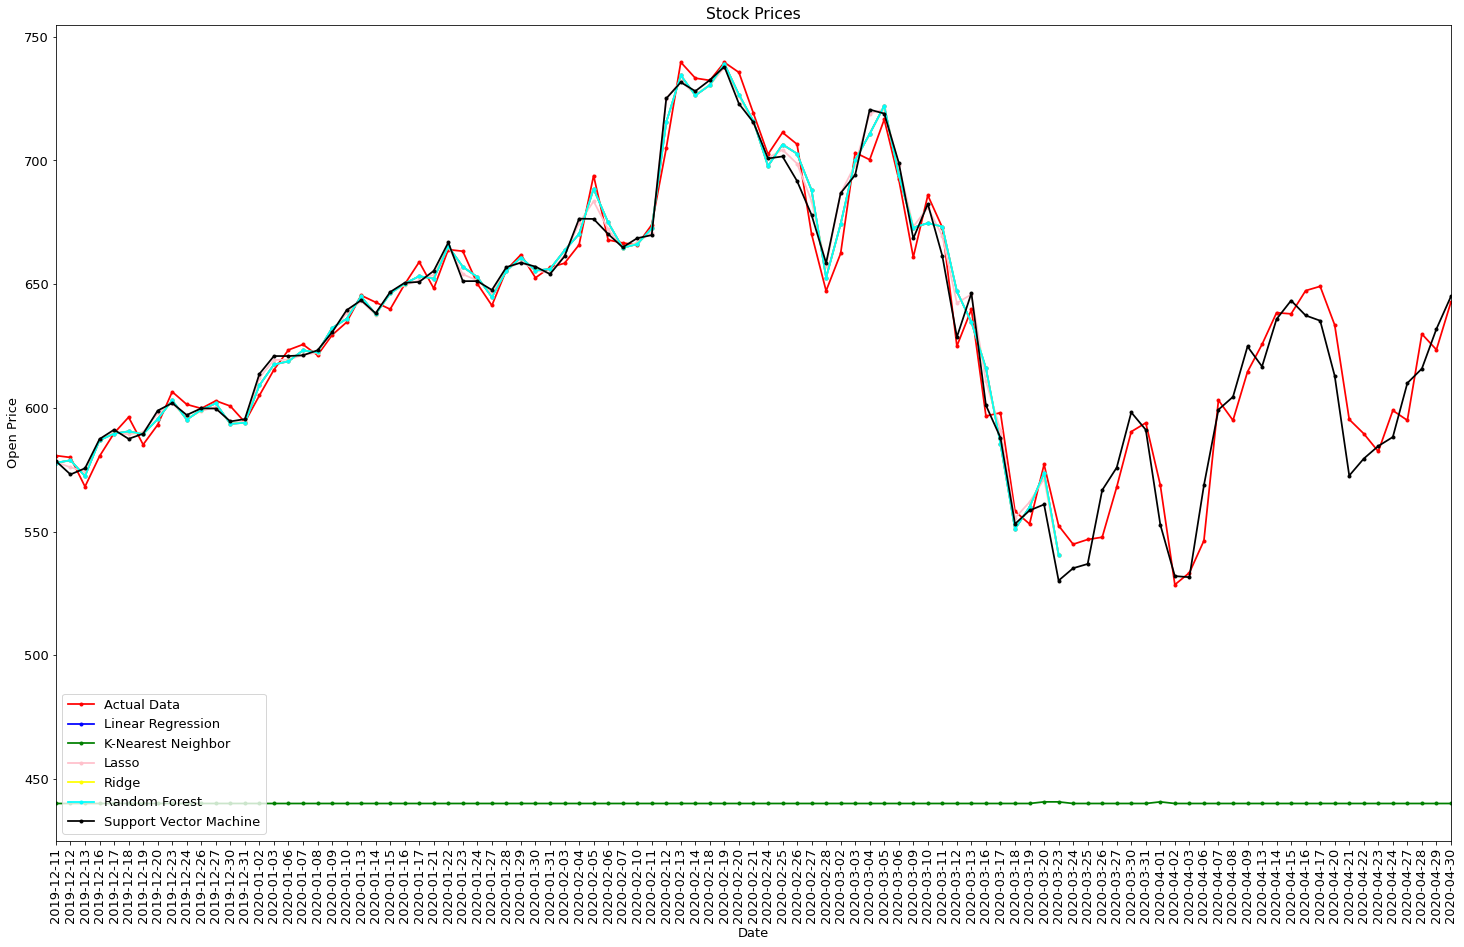

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055, 20521.38620251928]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073, 0.1266565497690703, 0.002920748187002187, 45.73310694702862]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  CSGS_CSG Systems International Inc
KNN MSE:  5.982144777286913


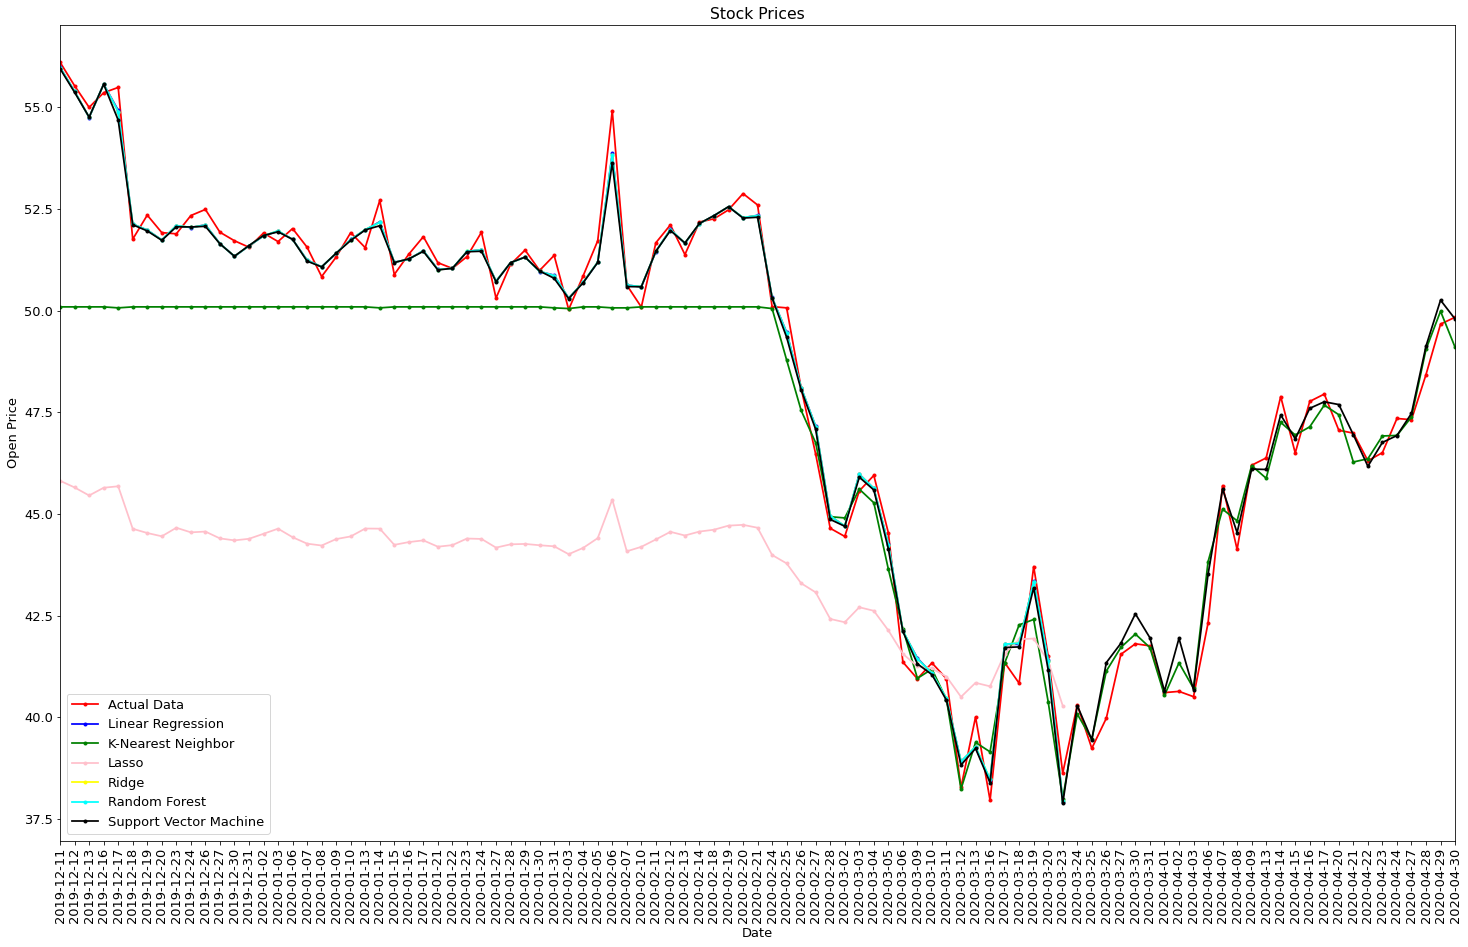

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055, 20521.38620251928, 5.84214526801505]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073, 0.1266565497690703, 0.002920748187002187, 45.73310694702862, 0.21850659799362]
++++++++++++++++++++END++++++++++++++++++++++++++++++++
STOCK NAME:  CSU_Constellation Software
KNN MSE:  10.759084868082153


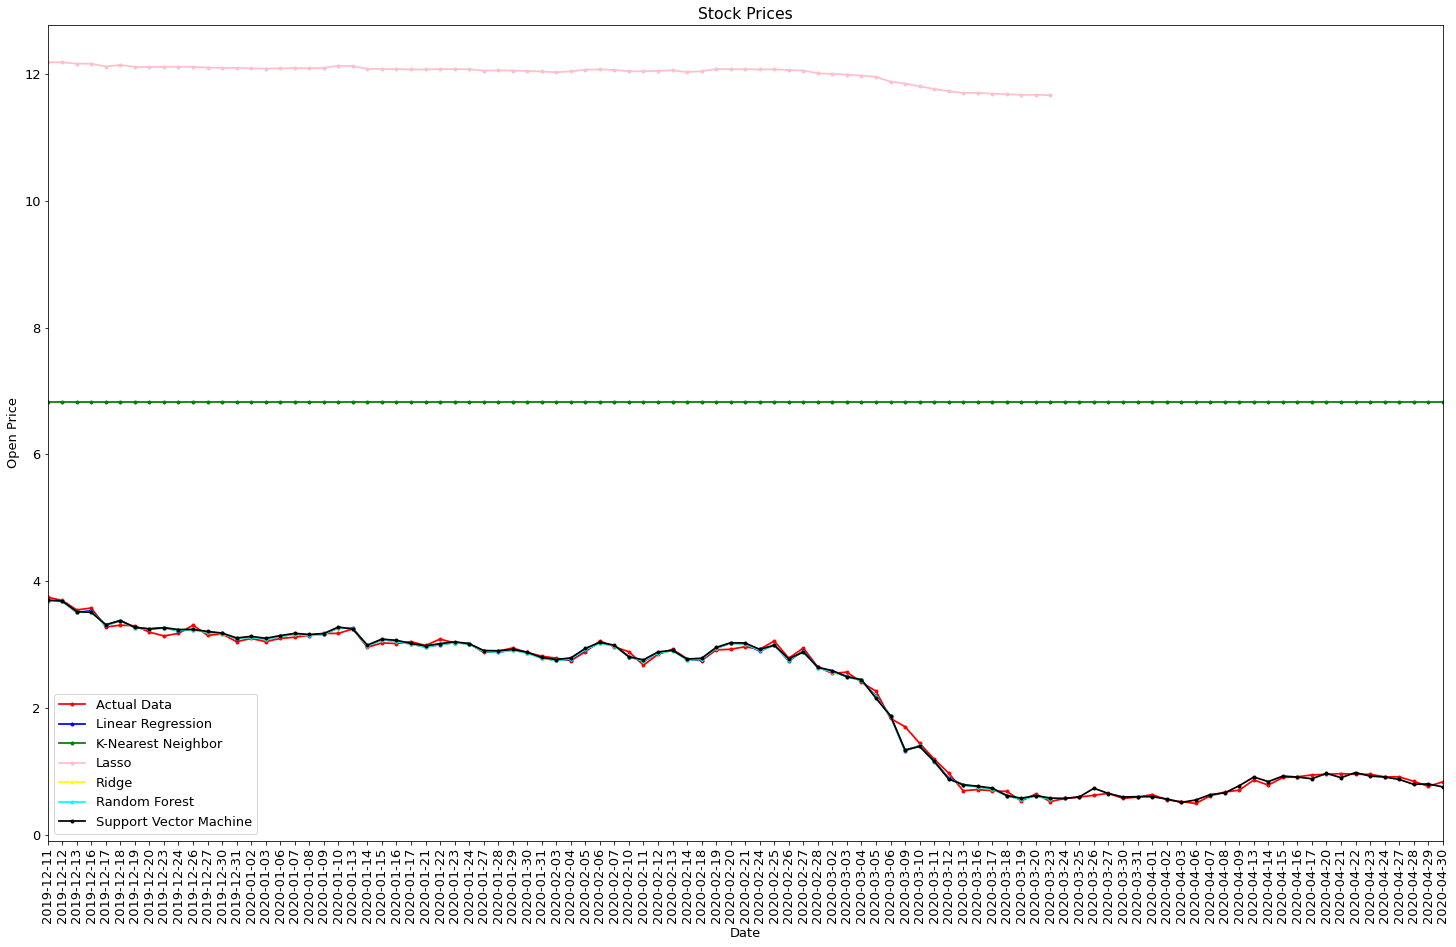

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859557693412141]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055, 20521.38620251928, 5.84214526801505, 10.091965998077526]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073, 0.1266565497690703, 0.002920748187002187, 45.73310694702862, 0.21850659799362, 0.006216477302681764]
++++++++++++++++++++END++++++++++

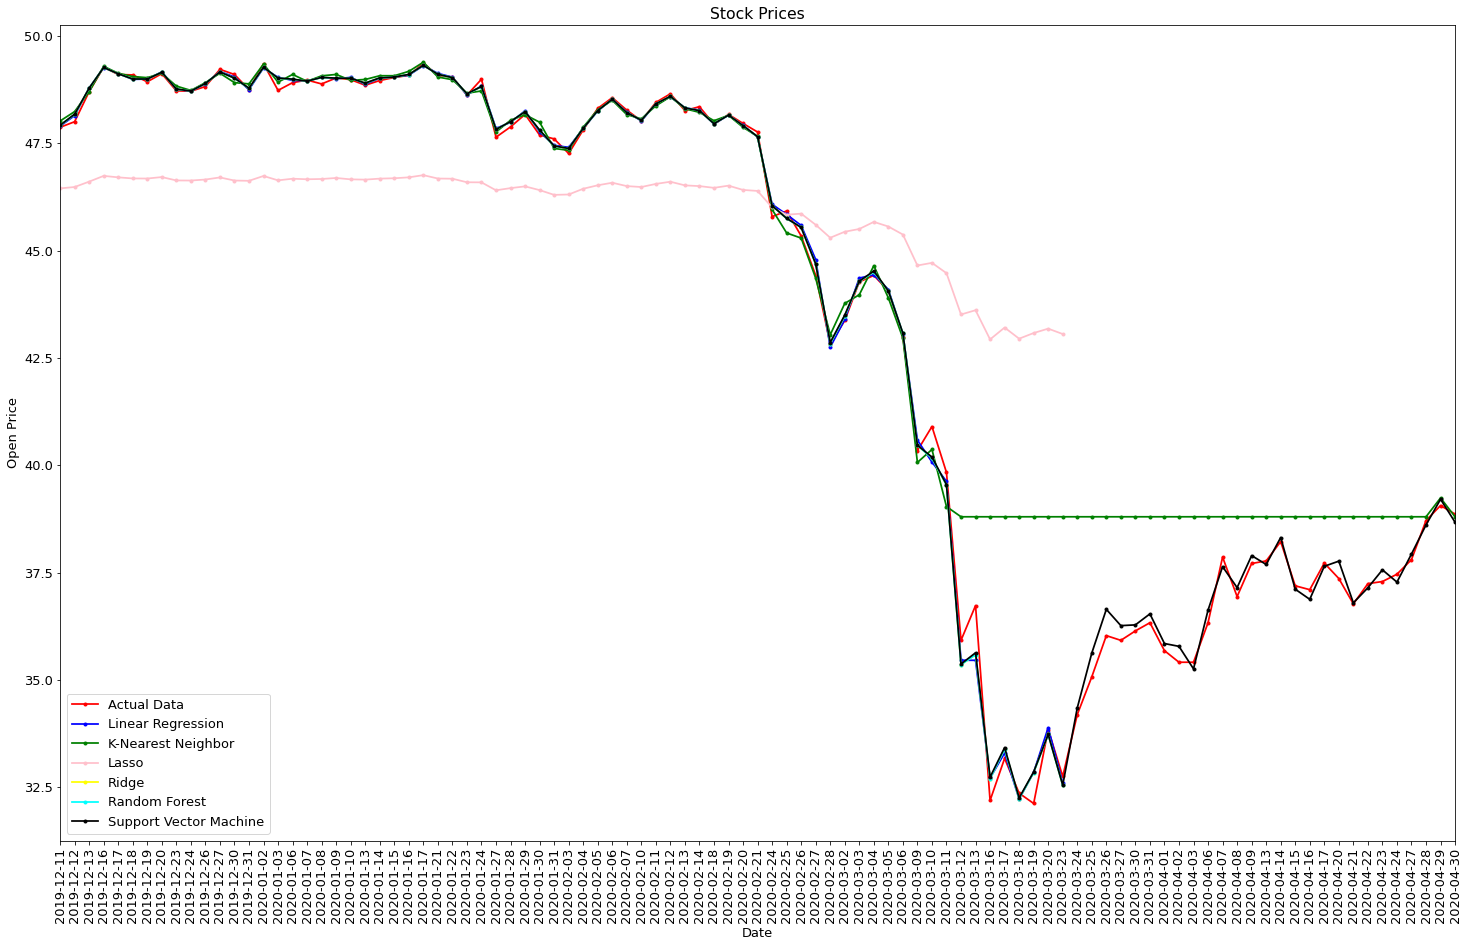

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859557693412141, 0.021775783366898498]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055, 20521.38620251928, 5.84214526801505, 10.091965998077526, 0.9233397449841959]
SVM MSE:
 [0.47145577565992747, 0.015224220196290073, 0.1266565497690703, 0.0029207481

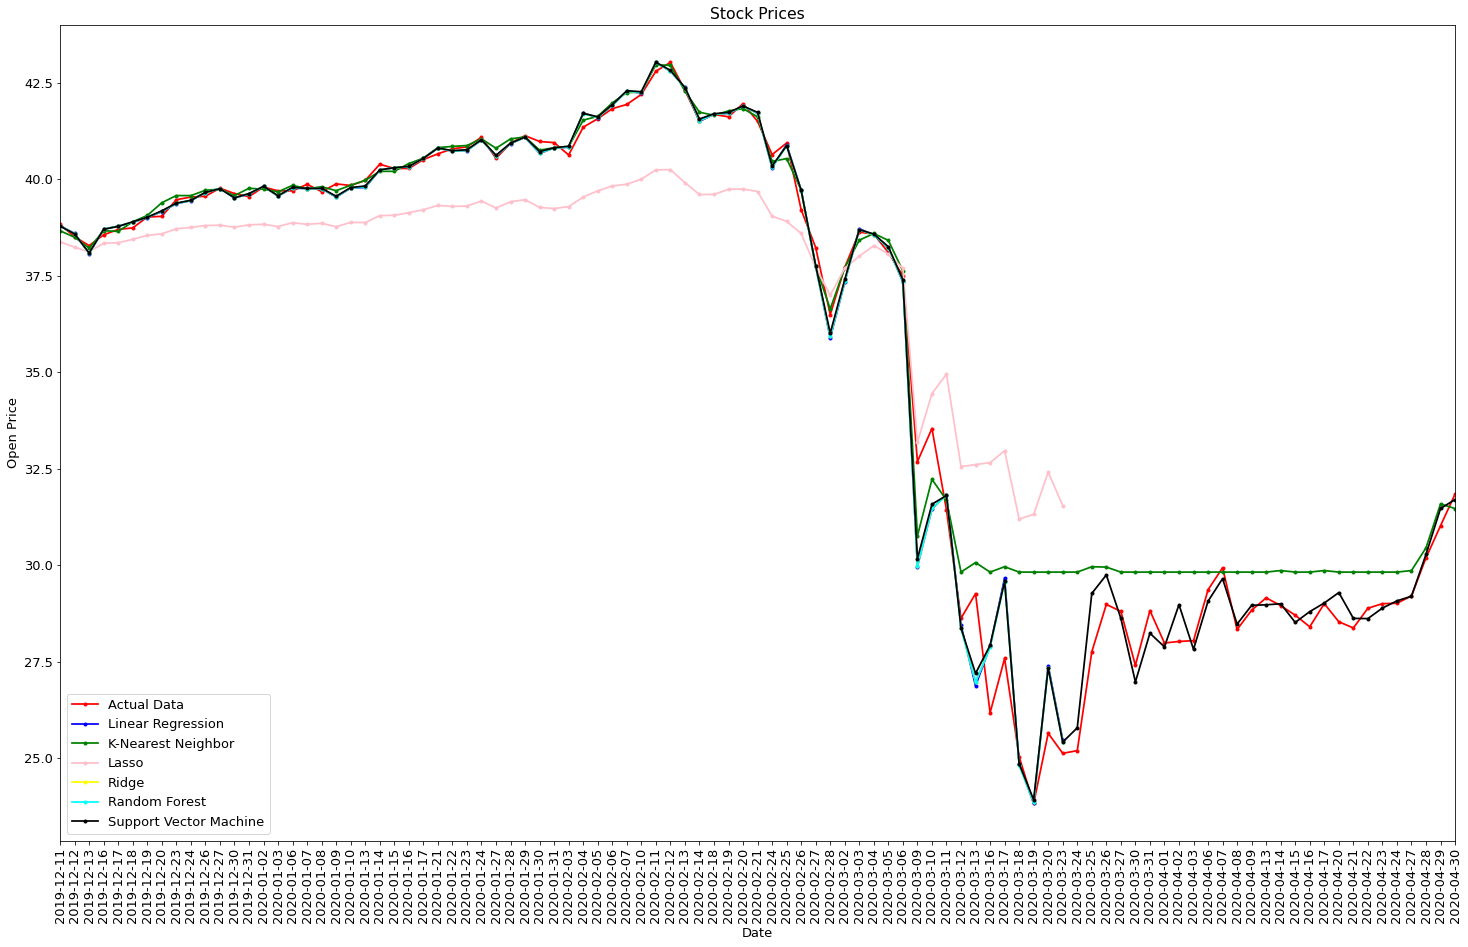

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859557693412141, 0.021775783366898498, 0.1211272595524699]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055, 20521.38620251928, 5.84214526801505, 10.091965998077526, 0.9233397449841959, 0.4393

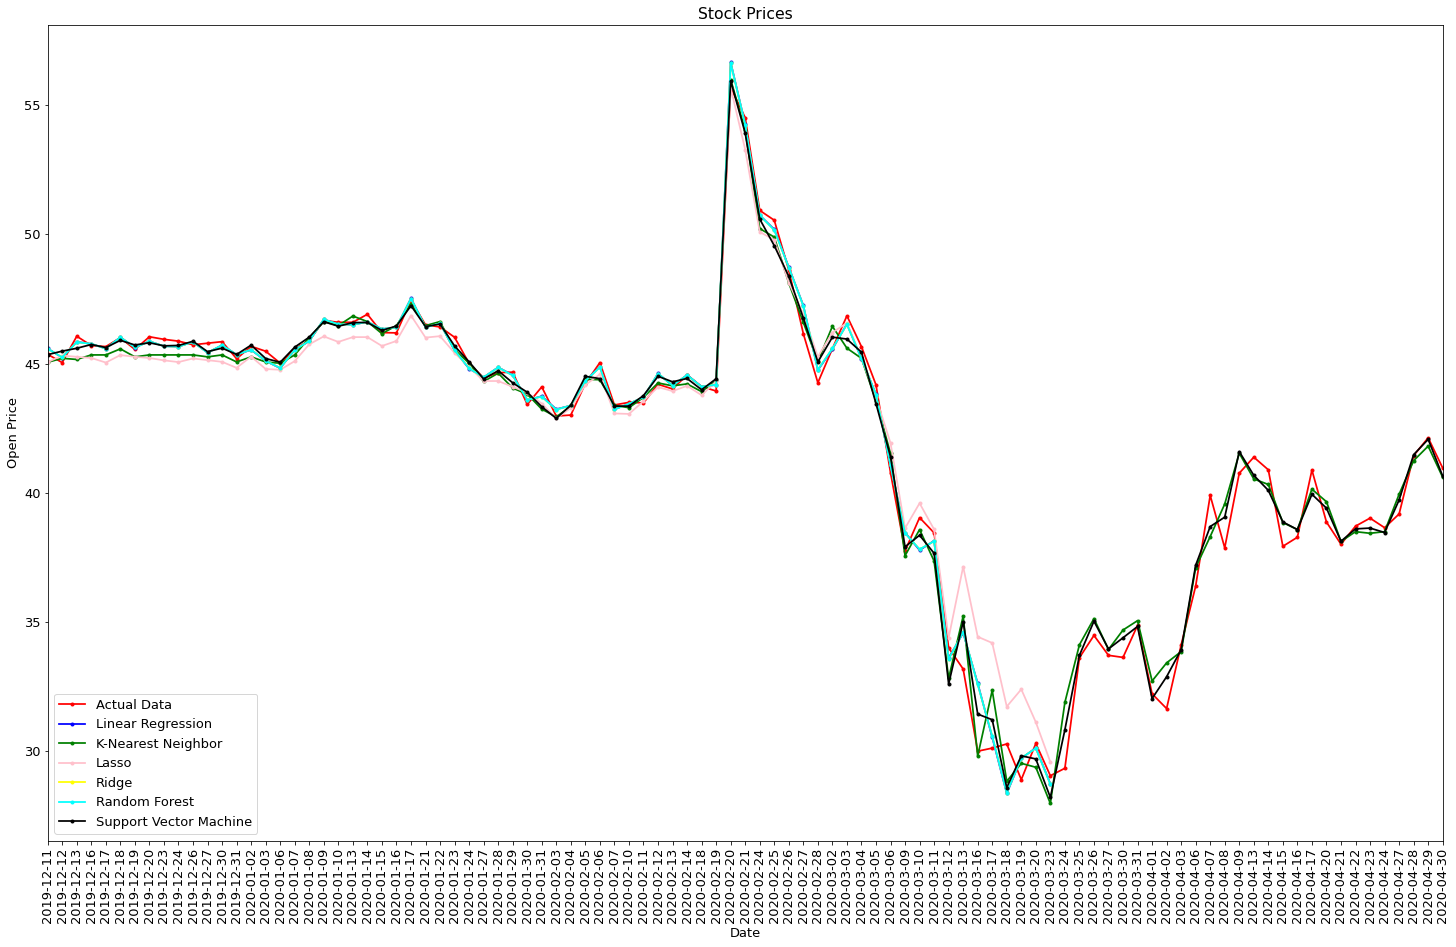

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859557693412141, 0.021775783366898498, 0.1211272595524699, 0.14997507120152528]
Random Forest MSE:
 [2.3902478927860313, 4.3487754014884406, 0.6866595844793624, 0.058152680164434055, 2

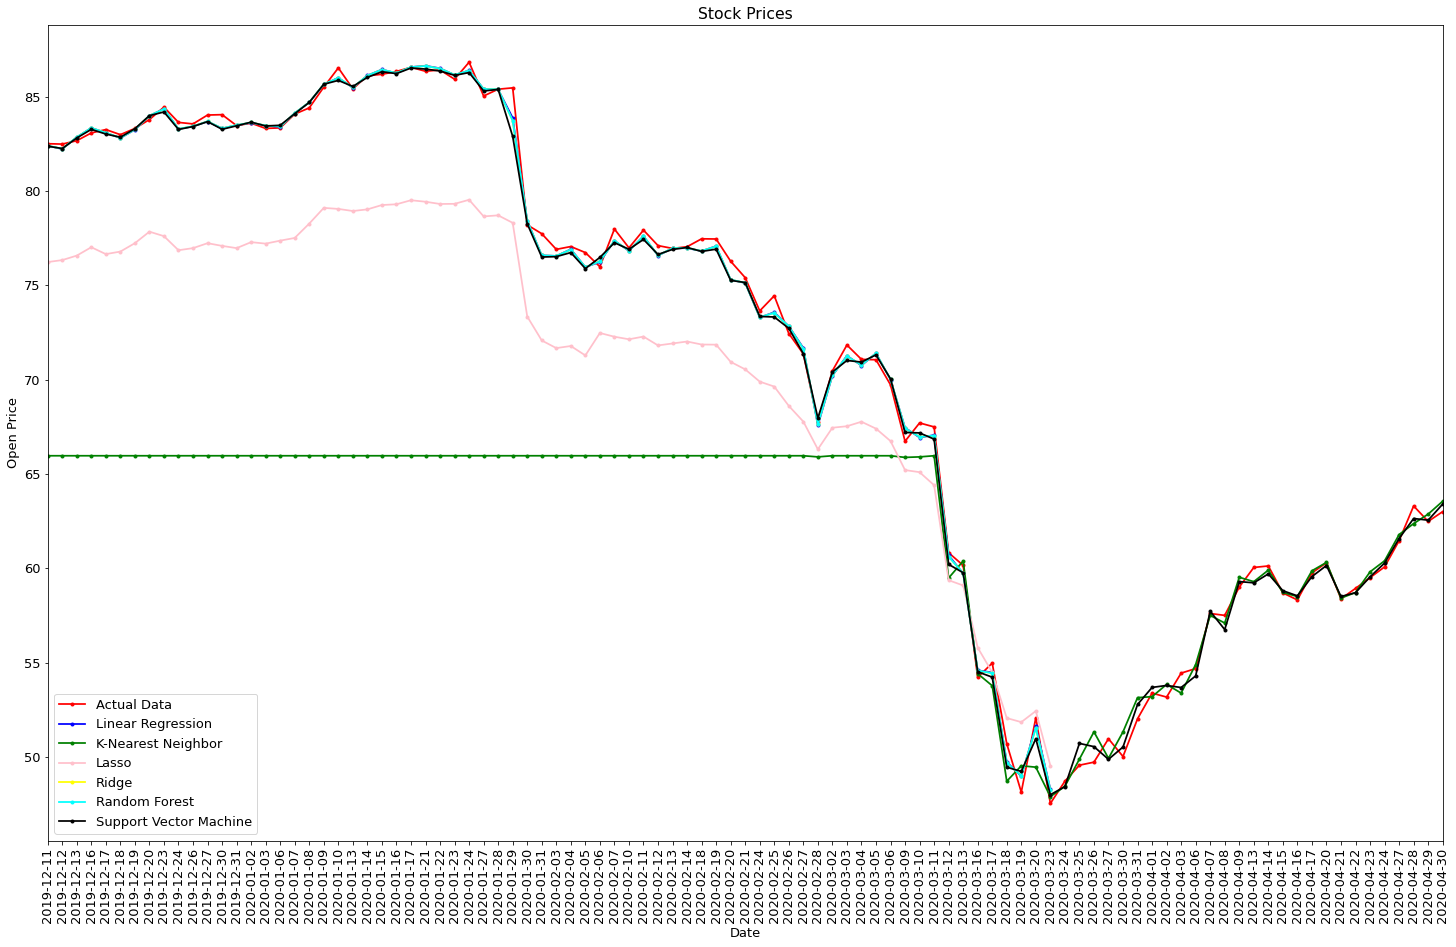

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695, 0.15040907040919532]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429, 108.52450315717986]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075, 21.06817775895421]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859557693412141, 0.021775783366898498, 0.1211272595524699, 0.14997507120152528, 0.15086717869046004]
Random Forest MSE:
 [2.

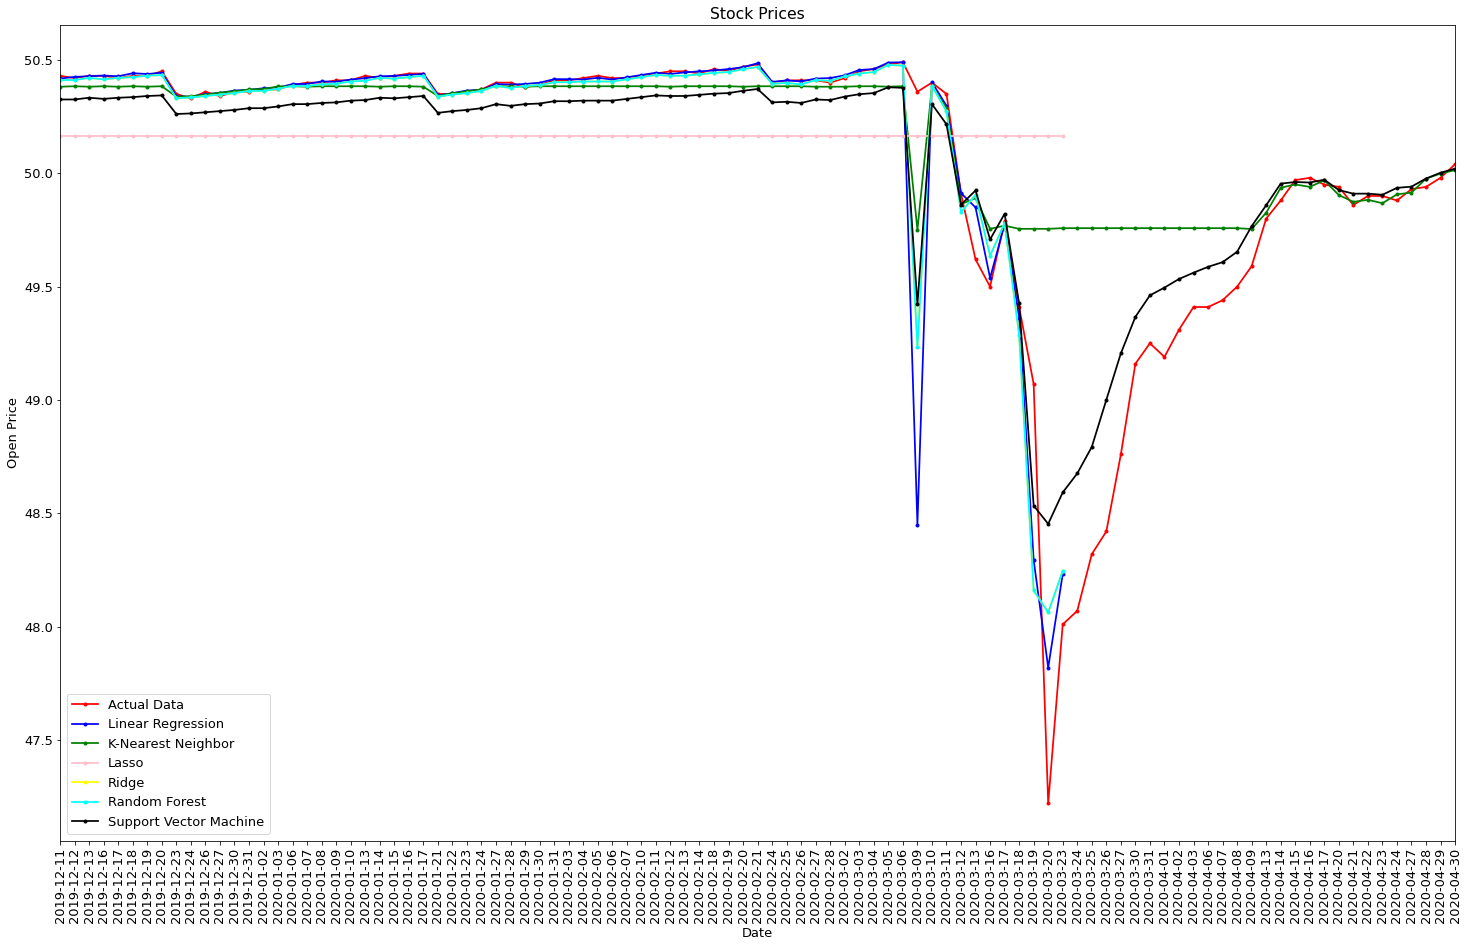

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695, 0.15040907040919532, 0.014919092770809108]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429, 108.52450315717986, 0.06185381016997528]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075, 21.06817775895421, 0.14944275007893654]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859557693412141, 0.021775783366898498, 0.1211272595524699, 0

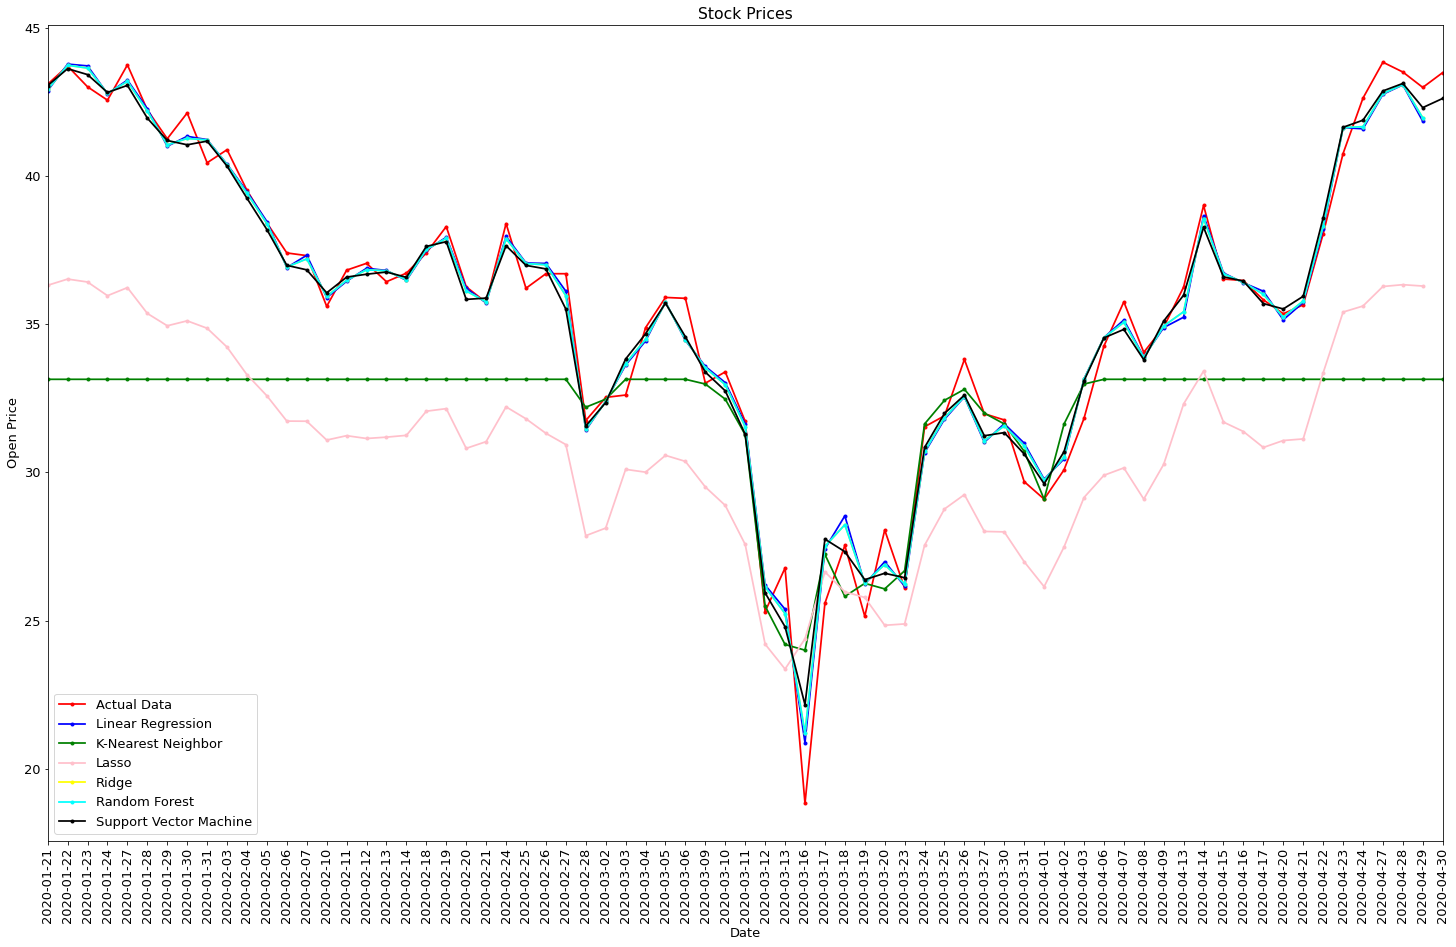

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695, 0.15040907040919532, 0.014919092770809108, 0.2828606716295944]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429, 108.52450315717986, 0.06185381016997528, 76.7451316137562]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075, 21.06817775895421, 0.14944275007893654, 38.07655787367376]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.003021635874409128, 24.771643710387988, 0.21313025399877011, 0.005859

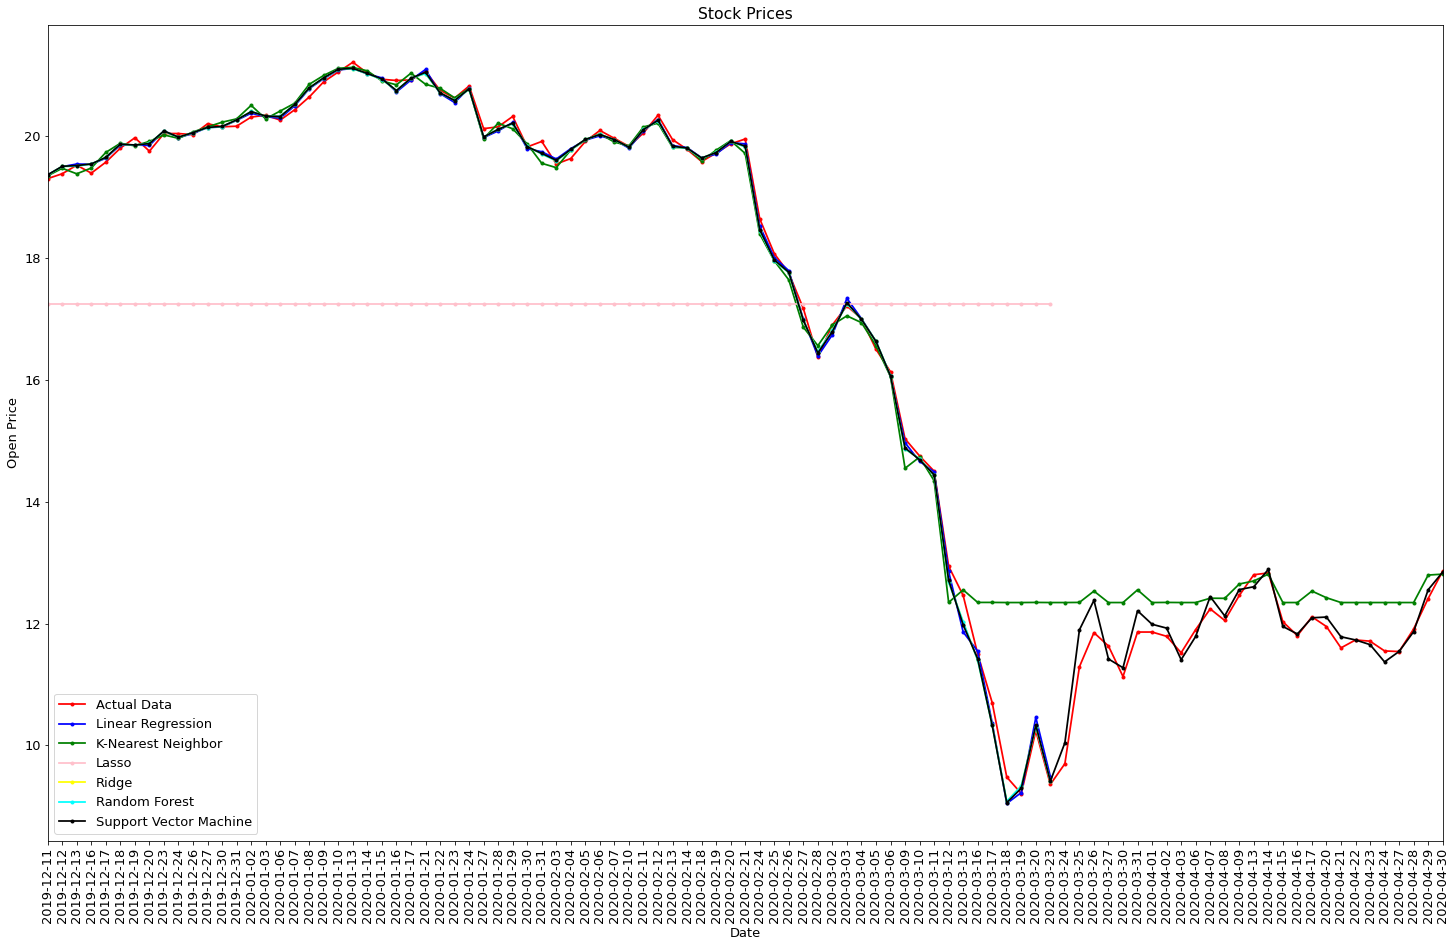

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695, 0.15040907040919532, 0.014919092770809108, 0.2828606716295944, 0.01340690544743064]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429, 108.52450315717986, 0.06185381016997528, 76.7451316137562, 0.16883984146092584]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075, 21.06817775895421, 0.14944275007893654, 38.07655787367376, 5.822676678850372]
Ridge MSE:
 [0.42466844159929573, 0.016569574174650267, 0.1256596169867634, 0.00302163

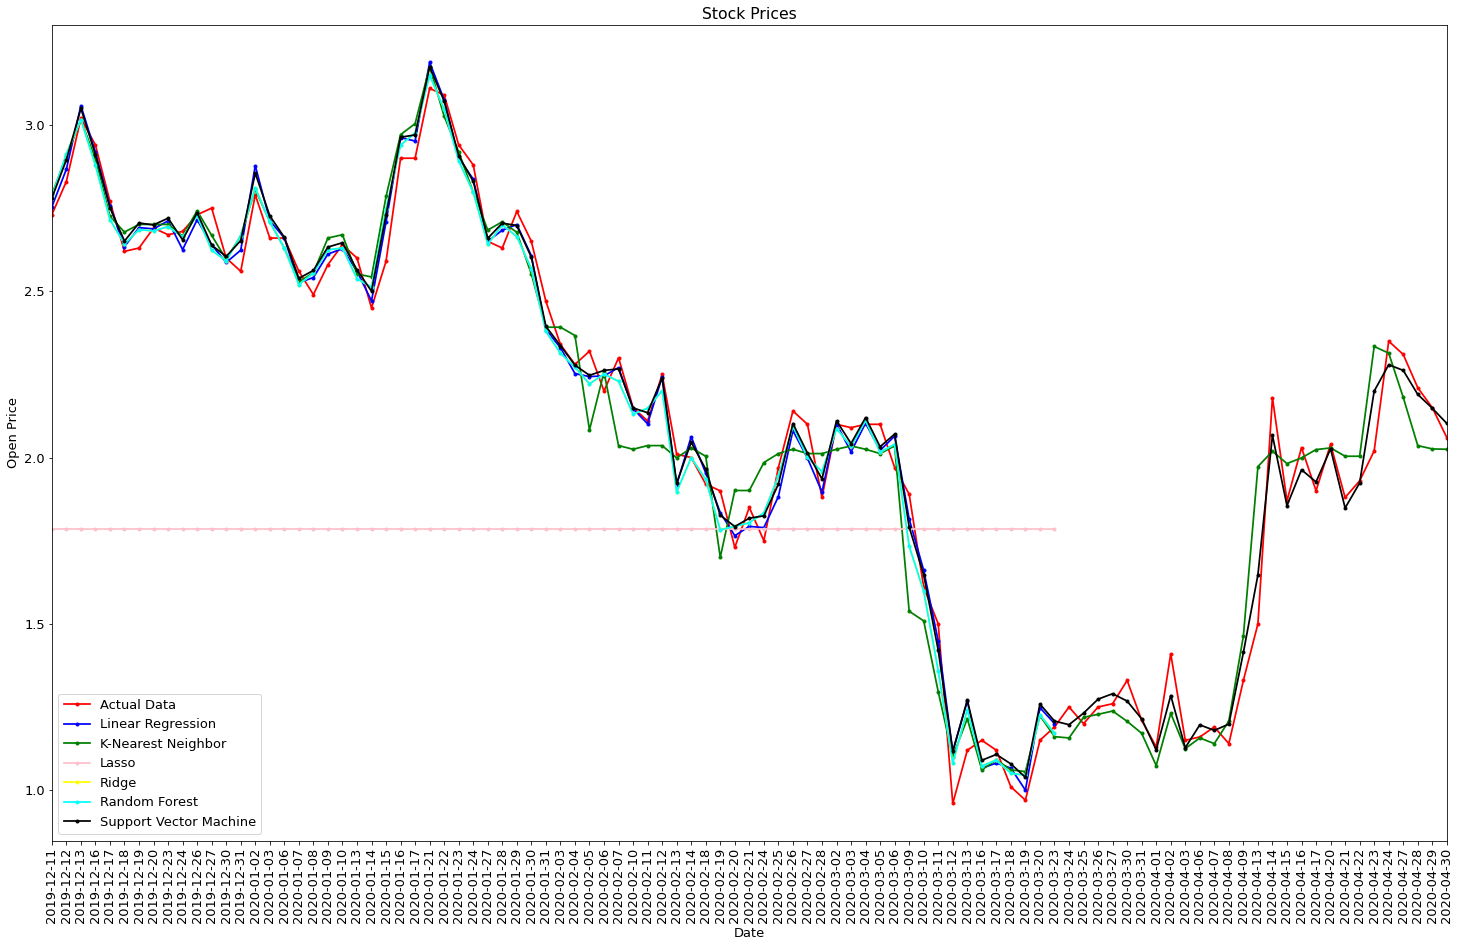

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695, 0.15040907040919532, 0.014919092770809108, 0.2828606716295944, 0.01340690544743064, 0.004081034148785838]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429, 108.52450315717986, 0.06185381016997528, 76.7451316137562, 0.16883984146092584, 0.09725534982549101]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075, 21.06817775895421, 0.14944275007893654, 38.07655787367376, 5.822676678850372, 3.667575954532019]
Ridge MSE:
 [0.424668441

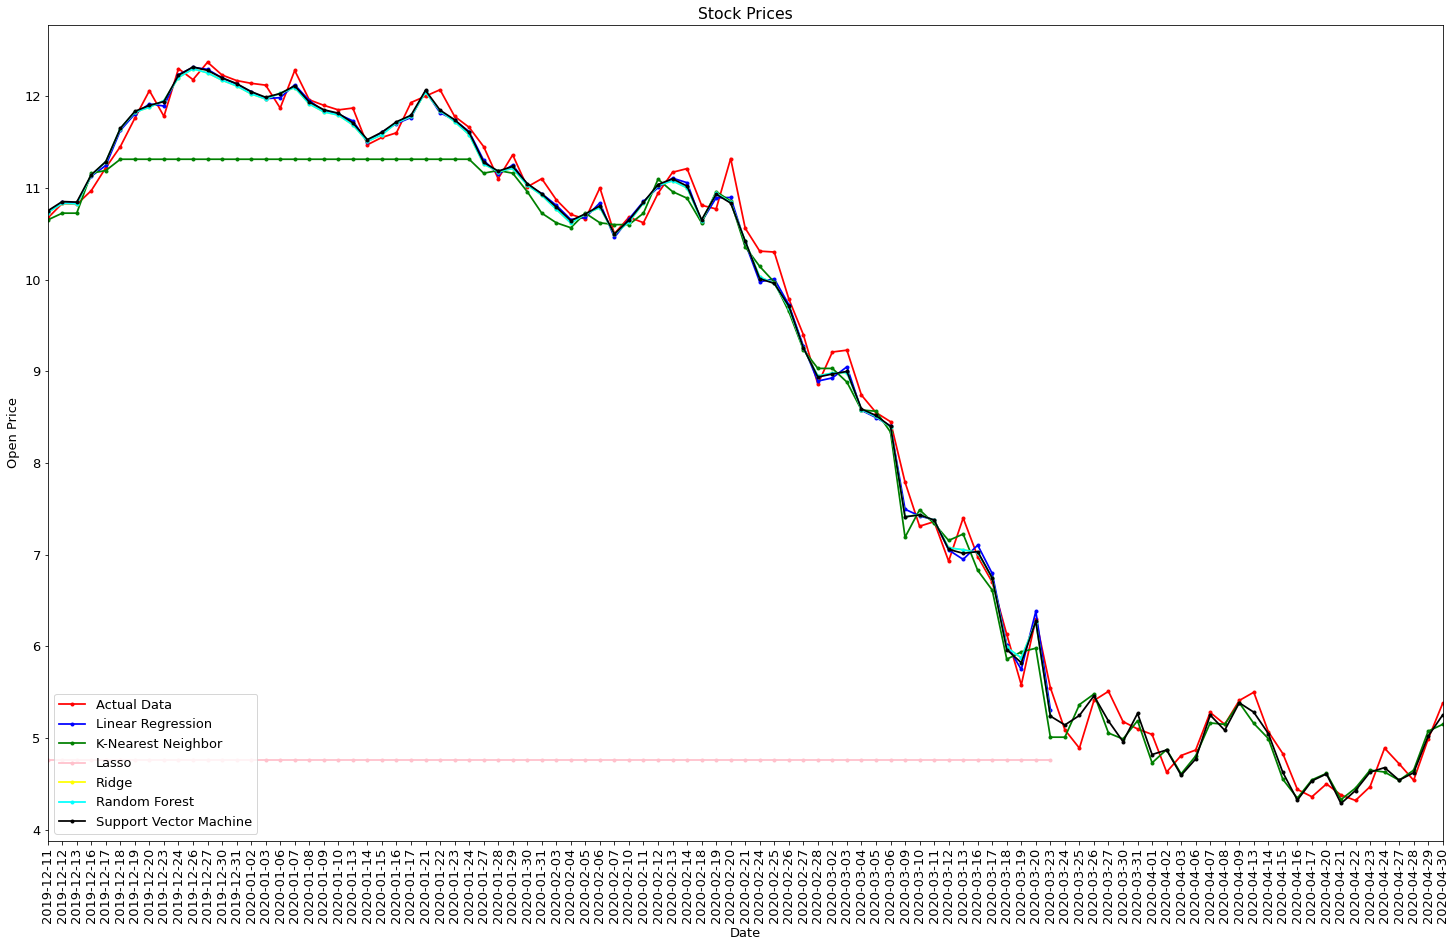

Mean Square Error:

Linear Regression MSE:
 [0.4116863995990767, 0.016520291658930555, 0.12716575236113623, 0.0018728791811405054, 24.76943054684517, 0.21206370668876495, 0.005575342056804752, 0.022438583773394027, 0.12580194584309612, 0.15017966206019695, 0.15040907040919532, 0.014919092770809108, 0.2828606716295944, 0.01340690544743064, 0.004081034148785838, 0.017405705395085794]
KNN MSE:
 [2.853274922376689, 5.130390976645849, 0.9554228122123016, 0.07069360019322053, 20875.23590359247, 5.982144777286913, 10.759084868082153, 1.1347449153899352, 0.6060480381355818, 0.2976060650103429, 108.52450315717986, 0.06185381016997528, 76.7451316137562, 0.16883984146092584, 0.09725534982549101, 0.3454349235197293]
Lasso MSE:
 [15.493929862469383, 15.670372658663553, 1.5948708135211396, 1.4781068267559903, 35.07868681214801, 35.92465254876913, 70.52409301265317, 7.97067852780275, 4.564744564968045, 0.6239127198684075, 21.06817775895421, 0.14944275007893654, 38.07655787367376, 5.822676678850372, 3

In [ ]:
all_df = [df1, df2, df3, df4, df5 ,df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20]
LR_MSE = []
KNN_MSE = []
LASSO_MSE = []
RIDGE_MSE = []
RF_MSE = []
SVM_MSE = []

for df in all_df:
    print("STOCK NAME: ", df['Stock name'][0])
    x_train, y_train, x_valid, y_valid, date_train, date_valid = preprocessing(df)

    ## Linear Regression 
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    pred = reg.predict(x_valid)
    lr_mse = mean_squared_error(y_valid, pred)
    LR_MSE.append(lr_mse)
    
    ## Standard Scaler
    data_scaler = StandardScaler()
    s_train = data_scaler.fit_transform(np.asarray(x_train))
    s_valid = data_scaler.transform(np.asarray(x_valid))
    
#     target_scaler = StandardScaler()
#     s_label_train = target_scaler.fit_transform(np.asarray(y_train).reshape(-1,1))
#     s_label_valid = target_scaler.transform(np.asarray(y_valid).reshape(-1,1))
    
    ## KNeighbor Regressor
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(s_train, y_train)
    pred2 = knn.predict(s_valid)
    knn_mse = mean_squared_error(y_valid, pred2)
    KNN_MSE.append(knn_mse)
    print("KNN MSE: ", knn_mse)
    
#     ## KNN vs Linear Regression
#     plt.rcParams.update({'font.size': 13})
#     fig1, ax1 = plt.subplots(figsize = (25,15))
#     ax1.plot(date_valid[230:300], y_valid[230:300], color = 'red', marker='.', linewidth='0.75')
#     ax1.plot(date_valid[230:300], pred[230:300], color = 'blue', marker='.', linewidth='0.75')
#     ax1.plot(date_valid[230:300], pred2[230:300], color = 'green', marker='.', linewidth='0.75')
#     plt.xticks(rotation='90')
#     plt.gca().margins(x=0)
#     plt.legend(['Actual Data', 'Linear Regression', 'K-Nearest Neighbor'], loc='lower left')
#     ax1.set(xlabel="Date", ylabel="Open Price",title="Stock Prices");
#     plt.show()

    ## Lasso
    lasso = Lasso(alpha=10)
    lasso.fit(x_train,y_train)
    pred3 = lasso.predict(x_valid)
    lasso_mse = mean_squared_error(y_valid, pred3)
    LASSO_MSE.append(lasso_mse)

    
    ## Ridge
    ridge = Ridge(alpha=2)
    ridge.fit(x_train,y_train)
    pred4 = ridge.predict(x_valid)
    ridge_mse = mean_squared_error(y_valid, pred4)
    RIDGE_MSE.append(ridge_mse)

    
#     ## Linear Reg vs Lasso vs Ridge
#     plt.rcParams.update({'font.size': 13})
#     fig2, ax2 = plt.subplots(figsize = (25,15))
#     ax2.plot(date_valid[230:300], y_valid[230:300], color = 'red', marker='.', linewidth='0.75')
#     ax2.plot(date_valid[230:300], pred[230:300], color = 'blue', marker='.', linewidth='0.75')
#     ax2.plot(date_valid[230:300], pred3[230:300], color = 'green', marker='.', linewidth='0.75')
#     ax2.plot(date_valid[230:300], pred4[230:300], color = 'yellow', marker='.', linewidth='0.75')
#     plt.xticks(rotation='90')
#     plt.gca().margins(x=0)
#     plt.legend(['Actual Data', 'Simple Linear Regression', 'Lasso Regression', 'Ridge Regression'], loc='lower left')
#     ax2.set(xlabel="Date", ylabel="open Price",title="Stock Prices");
#     plt.show()
    
    ## Random Forest Regressor
    rforest = RandomForestRegressor(n_estimators = 100, random_state = 1) 
    rforest.fit(x_train,y_train)
    pred5 = rforest.predict(x_valid)
    rf_mse = mean_squared_error(y_valid, pred5)
    RF_MSE.append(rf_mse)

    
    ## SVM
    svmm = svm.SVR(gamma='auto', kernel='linear').fit(s_train,y_train)
    pred6 = svmm.predict(s_valid)
    svm_mse = mean_squared_error(y_valid, pred6)
    SVM_MSE.append(svm_mse)

    
    ## SVM vs KNN
    plt.rcParams.update({'font.size': 13})
    fig3, ax3 = plt.subplots(figsize = (25,15))
    ax3.plot(date_valid[230:350], y_valid[230:350], color = 'red', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred[230:300], color = 'blue', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:350], pred2[230:350], color = 'green', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred3[230:300], color = 'pink', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred4[230:300], color = 'yellow', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:300], pred4[230:300], color = 'cyan', marker='.', linewidth='1.75')
    ax3.plot(date_valid[230:350], pred6[230:350], color = 'black', marker='.', linewidth='1.75')
    plt.xticks(rotation='90')
    plt.gca().margins(x=0)
#     plt.legend(['Actual Data', 'K-Nearest Neighbor', 'Support Vector Machine'], loc='lower left')
    plt.legend(['Actual Data', 'Linear Regression', 'K-Nearest Neighbor', 'Lasso', 'Ridge', 'Random Forest', 'Support Vector Machine'], loc='lower left')
    ax3.set(xlabel="Date", ylabel="Open Price", title="Stock Prices");
    plt.show()
    
    print("Mean Square Error:\n")
    print("Linear Regression MSE:\n", LR_MSE)
    print("KNN MSE:\n", KNN_MSE)
    print("Lasso MSE:\n", LASSO_MSE)
    print("Ridge MSE:\n", RIDGE_MSE)
    print("Random Forest MSE:\n", RF_MSE)
    print("SVM MSE:\n", SVM_MSE)
    print("++++++++++++++++++++END++++++++++++++++++++++++++++++++")
    
    

In [ ]:
LR_MSE

In [ ]:
import matplotlib.pyplot as plt

Stocks = ['AirCanada', 'Ballard Power Systems', 'Boyd Group Services', 'Trilogy Metals', 'CoStar Group', 'CSG Systems International', 'Constellation Software', 'Dollarama', 'Enbridge', 'ETRADE Financial Corporation', 'CGI Incorporation', 'Goeasy Limited', 'Kirkland Lake', 'Manulife Financial', 'Neptune Wellness', 'North American Construction', 'Open Text', 'Shopify', 'TD Bank', 'TH']


In [ ]:
Stocks

In [ ]:
# fig = plt.figure(figsize = (10, 5))

# plt.bar(LR_MSE, Stocks, color ='maroon',  width = 0.4)

In [ ]:
S = pd.DataFrame(Stocks)
S.columns = ['Stocks']
st = S['Stocks']
st

# Individual Stock MSE Graphs

In [ ]:
Methods = ['Linear Regression', 'KNN', 'Lasso', 'Ridge', 'Random Forest', 'SVM']

## 1
AC_LR = LR_MSE[0]
AC_MSE = KNN_MSE[0]
AC_Lasso = LASSO_MSE[0]
AC_Ridge = RIDGE_MSE[0]
AC_RF = RF_MSE[0]
AC_svm = SVM_MSE[0]
AC_MSE = [AC_LR, AC_MSE, AC_Lasso, AC_Ridge, AC_RF, AC_svm]
AC_MSE


## 2
LR2 = LR_MSE[1]
KNN2 = KNN_MSE[1]
Lasso2 = LASSO_MSE[1]
Ridge2 = RIDGE_MSE[1]
RF2 = RF_MSE[1]
svm2 = SVM_MSE[1]
MSE2 = [LR2, KNN2, Lasso2, Ridge2, RF2, svm2]

## 3
LR3 = LR_MSE[2]
KNN3 = KNN_MSE[2]
Lasso3 = LASSO_MSE[2]
Ridge3 = RIDGE_MSE[2]
RF3 = RF_MSE[2]
svm3 = SVM_MSE[2]
MSE3 = [LR3, KNN3, Lasso3, Ridge3, RF3, svm3]

##4
LR4 = LR_MSE[18]
KNN4 = KNN_MSE[18]
Lasso4 = LASSO_MSE[18]
Ridge4 = RIDGE_MSE[18]
RF4 = RF_MSE[18]
svm4 = SVM_MSE[18]
MSE4 = [LR4, KNN4, Lasso4, Ridge4, RF4, svm4]

##5
LR5 = LR_MSE[17]
KNN5 = KNN_MSE[17]
Lasso5 = LASSO_MSE[17]
Ridge5 = RIDGE_MSE[17]
RF5 = RF_MSE[17]
svm5 = SVM_MSE[17]
MSE5 = [LR5, KNN5, Lasso5, Ridge5, RF5, svm5]

##6
LR6 = LR_MSE[16]
KNN6 = KNN_MSE[16]
Lasso6 = LASSO_MSE[16]
Ridge6 = RIDGE_MSE[16]
RF6 = RF_MSE[16]
svm6 = SVM_MSE[16]
MSE6 = [LR6, KNN6, Lasso6, Ridge6, RF6, svm6]

In [ ]:
M = pd.DataFrame(Methods)
M.columns = ['Method']
M = M['Method']
M

In [ ]:
## 1
AC_mse = pd.DataFrame(AC_MSE)
AC_mse.columns = ['Aircanada']
AC_mse = AC_mse['Aircanada']
AC_mse

## 2
mse2 = pd.DataFrame(MSE2)
mse2.columns = ['Ballard Power Systems']
mse2 = mse2['Ballard Power Systems']
mse2

## 3
mse3 = pd.DataFrame(MSE3)
mse3.columns = ['Boyd']
mse3 = mse3['Boyd']
mse3

## 4
mse4 = pd.DataFrame(MSE4)
mse4.columns = ['TD Bank']
mse4 = mse4['TD Bank']
mse4

## 5
mse5 = pd.DataFrame(MSE5)
mse5.columns = ['Shopify']
mse5 = mse5['Shopify']
mse5

## 6
mse6 = pd.DataFrame(MSE6)
mse6.columns = ['Open Text']
mse6 = mse6['Open Text']
mse6

In [ ]:
mse6.name

In [ ]:
mse = [AC_mse, mse2, mse3, mse4, mse5, mse6]

for i in mse:
    
    print("Stock Name: ", i.name)
    fig, ax = plt.subplots(figsize =(16, 9))

    ax.barh(M, i)

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 

    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

    # Show top values  
    ax.invert_yaxis()

    # Add annotation to bars 
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')

    # Add Plot Title 
    ax.set_title('MSE of different methods', loc ='left', )

    # Add Text watermark 
    fig.text(0.9, 0.15, 'Error', fontsize = 12, 
             color ='grey', ha ='right', va ='bottom', 
             alpha = 0.7)
    
    
    # Show Plot 
    plt.show()

In [ ]:
df = [LR_df, KNN_df, Lasso_df, Ridge_df, RF_df, svm_df, AC_MSE]

for i in df:
    fig, ax = plt.subplots(figsize =(16, 9))

    ax.barh(st, i)

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 

    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

    # Show top values  
    ax.invert_yaxis()

    # Add annotation to bars 
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')

    # Add Plot Title 
    ax.set_title('Stocks MSE', loc ='left', )

    # Add Text watermark 
    fig.text(0.9, 0.15, 'Stocks', fontsize = 12, 
             color ='grey', ha ='right', va ='bottom', 
             alpha = 0.7)

    # Show Plot 
    plt.show()

In [ ]:
LR = pd.DataFrame(LR_MSE)
LR.columns = ['MSE']
LR_df = LR['MSE']
LR_df

KNN = pd.DataFrame(KNN_MSE)
KNN.columns = ['MSE']
KNN_df = KNN['MSE']
KNN_df

Lasso = pd.DataFrame(LASSO_MSE)
Lasso.columns = ['MSE']
Lasso_df = Lasso['MSE']
Lasso_df

Ridge = pd.DataFrame(RIDGE_MSE)
Ridge.columns = ['MSE']
Ridge_df = Ridge['MSE']
Ridge_df

RF = pd.DataFrame(RF_MSE)
RF.columns = ['MSE']
RF_df = RF['MSE']
RF_df

svm = pd.DataFrame(SVM_MSE)
svm.columns = ['MSE']
svm_df = svm['MSE']
svm_df

In [ ]:
df = [LR_df, KNN_df, Lasso_df, Ridge_df, RF_df, svm_df, AC_MSE]

for i in df:
    fig, ax = plt.subplots(figsize =(16, 9))

    ax.barh(st, i)

    # Remove axes splines 
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks 
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels 
    ax.xaxis.set_tick_params(pad = 5) 
    ax.yaxis.set_tick_params(pad = 10) 

    # Add x, y gridlines 
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)

    # Show top values  
    ax.invert_yaxis()

    # Add annotation to bars 
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')

    # Add Plot Title 
    ax.set_title('Stocks MSE', loc ='left', )

    # Add Text watermark 
    fig.text(0.9, 0.15, 'Stocks', fontsize = 12, 
             color ='grey', ha ='right', va ='bottom', 
             alpha = 0.7)

    # Show Plot 
    plt.show()